# Julia First Steps

## Estimating π

Let us write a Julia function to compute π.

It will estimate π using the equation:

$π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$

In [2]:
function estimate_pi(n)
    s = 1.0
    for i in 1:n
        s += (isodd(i) ? -1 : 1) / (2i + 1)
    end
    return 4s
end

p = estimate_pi(100_000_000)
println("π ≈ $p")
println("Error is $(p - π)")

π ≈ 3.141592663589326
Error is 9.999532757376528e-9


Compare this with the equivalent Python 3 code:

```python
import math

def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s

p = estimate_pi(100_000_000)
print(f"π ≈ {p}")
print(f"Error is {p - math.pi}")
```

Similar, but notice the small differences:

|Julia|Python
|-----|------
|`function` | `def`
|`for i in X`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `for i in X:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`1:n` | `range(1, n+1)`
|`cond ? a : b` | `a if cond else b`
|`2i + 1` | `2 * i + 1`
|`4s` | `return 4 * s`
|`println(a, b)` | `print(a, b, sep="")`
|`print(a, b)` | `print(a, b, sep="", end="")`
|`"$p"` | `f"{p}"`
|`"$(p - π)"` | `f"{p - math.pi}"`

This example shows that:
* Julia can be just as concise and readable as Python.
* Indentation in Julia does not define the code structure like it is in Python.
  Instead, blocks end with `end`.
* Many math features are built in Julia and do not need to be imported.
* In Julia you can use mathy syntax, such as `2i` and `4s` (but you can write `2 * i` and `4 * s` if you prefer).
* In Julia, the `return` keyword at the end of a function is optional.
  The result of the last expression is returned (just `4s` can be used in this example).
* Julia does not hesitate to use Unicode characters like `π`.
  However, there are generally plain-ASCII equivalents (e.g., `π == pi`).

## Import vs. using Julia modules

`import` is more general and more flexible.

`import` is especilly conviniet when running Julia in parallel (see the `Parallelization` notebook).

`import` also makes the Julia code more readable.
You will know explictly the called methods (functions, variables) from which module are coming.

`using` makes the code more compact and readable, but less and explicit and challenging to debug (it is not clear which module provides the function that is executed).

It is a good programming practice to use `import` instead of `using`.

In Julia, `import Foo.Bar: a, b` corresponds to running `from foo.bar import a, b` in Python.

|Julia|Python
|-----|------
|`import Foo` | `from foo import *; import foo`
|`import Foo.Bar` | `from foo.bar import *; from foo import bar`
|`import Foo.Bar: a, b` | `from foo.bar import a, b`
|`import Foo: Bar` | `from foo import bar`

## Running Python code in Julia
Julia can easily run Python code using the `PyCall` module.

If the `PyCall` module is not already installed, add it in Julia:

In [ ]:
import Pkg
ENV["PYTHOM"] = ""
Pkg.add("PyCall")

And import the `PyCall` module:

In [3]:
import PyCall

We can use the `PyCall.pyimport()` function to import a Python module directly in Julia.

For example, let us check which Python version we are using:

In [4]:
sys = PyCall.pyimport("sys")
sys.version

"3.8.5 (default, Sep  4 2020, 02:23:17) \n[Clang 10.0.0 ]"

We can run the Python code discussed above.

This will take about 15 seconds to run, because Python is so slow...:

In [5]:
PyCall.py"""
import math
 
def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s
 
p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
"""


π ≈ 3.141592663589326
Error is 9.999532757376528e-09


As you can see, running arbitrary Python code is as simple as using py-strings (`PyCall.py"..."`).

In [6]:
PyCall.py"p"

3.141592663589326

We can compare this to the value we calculated above using Julia:

In [7]:
PyCall.py"p" - p

0.0

They are exactly equal.

As you can see, it is very easy to mix Julia and Python code.

So if there is a module you really love in Python, you can keep using it as long as you want!
For example, let us use NumPy:

In [8]:
np = PyCall.pyimport("numpy")
a = np.random.rand(2, 3)

2×3 Matrix{Float64}:
 0.997556  0.642777    0.134838
 0.434044  0.00266033  0.365324

Notice that `PyCall` automatically converts some Python types to Julia types, including NumPy arrays.

Note that Julia supports multi-dimensional arrays (analog to NumPy arrays) out of the box.
`Array{Float64, 2}` means that it is a 2-dimensional array of 64-bit floats.

`PyCall` also converts Julia arrays to NumPy arrays when needed:

In [9]:
exp_a = np.exp(a)

2×3 Matrix{Float64}:
 2.71165  1.90175  1.14435
 1.54349  1.00266  1.44098

If you want to use some Julia variable in a py-string, for example `exp_a`, you can do so by writing `$exp_a` like this:

In [10]:
PyCall.py"""
import numpy as np

result = np.log($exp_a)
"""

PyCall.py"result"

2×3 Matrix{Float64}:
 0.997556  0.642777    0.134838
 0.434044  0.00266033  0.365324

If you want to keep using Matplotlib, it is best to use the `PyPlot` module, rather than trying to use `PyCall.pyimport("matplotlib")`.

`PyPlot` provides a more straightforward interface with Julia, and it plays nicely with Jupyter.

If the `PyPlot` module is not already installed, add it in Julia:

In [ ]:
import Pkg
ENV["PYTHOM"] = ""
Pkg.add("PyPlot")

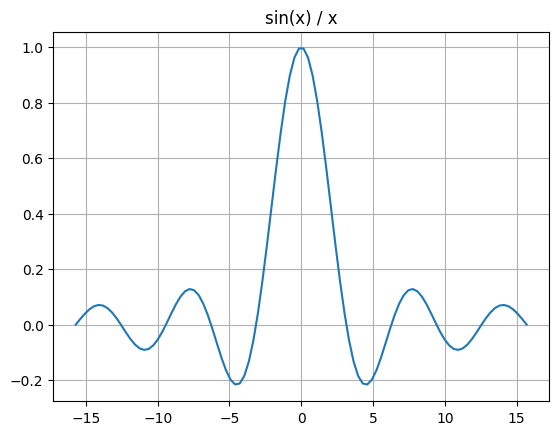

In [11]:
import PyPlot

x = range(-5π, 5π; length=100)
PyPlot.plt.plot(x, sin.(x) ./ x)
PyPlot.plt.title("sin(x) / x")
PyPlot.plt.grid("True")

That said, Julia has its own plotting libraries, such as the `Plots` and `Gadfly` modules, which are much more powerful convenient than `matplotlib`.

Julia's `range()` function acts much like NumPy's `linspace()` function, when you use the `length` argument.

However, it acts like Python's `range()` function when you use the `step` argument instead (except the upper bound is inclusive).

Julia's `range()` function returns an object which behaves just like an array, except it does not actually use any memory for its elements, it just stores the range parameters.

If you want to collect all of the elements into an array, use the `collect()` function (similar to Python's `list()` function):

In [12]:
println(collect(range(10, 80, step=20)))
println(collect(10:20:80)) # 10:20:80 is equivalent to the previous range
println(collect(range(10, 80, length=5))) # similar to NumPy's linspace()
step = (80-10)/(5-1) # 17.5
println(collect(10:step:80)) # equivalent to the previous range

[10, 30, 50, 70]
[10, 30, 50, 70]
[10.0, 27.5, 45.0, 62.5, 80.0]
[10.0, 27.5, 45.0, 62.5, 80.0]


The equivalent Python code is:

```python
# PYTHON
print(list(range(10, 80+1, 20)))
# there is no short-hand for range() in Python
print(np.linspace(10, 80, 5))
step = (80-10)/(5-1) # 17.5
print([i*step + 10 for i in range(5)])
```

|Julia|Python
|-----|------
|`np = PyPlot.pyimport("numpy")` | `import numpy as np`
|`import PyPlot` | `from pylab import *`
|`1:10` | `range(1, 11)`
|`1:2:10`<br />or<br />`range(1, 11, 2)` | `range(1, 11, 2)`
|`1.2:0.5:10.3`<br />or<br />`range(1.2, 10.3, step=0.5)` | `np.arange(1.2, 10.3, 0.5)`
|`range(1, 10, length=3)` | `np.linspace(1, 10, 3)`
|`collect(1:5)`<br />or<br />`[i for i in 1:5]` | `list(range(1, 6))`<br />or<br />`[i for i in range(1, 6)]`



## Loop Fusion

Above, we used `sin.(x) ./ x` (not `sin(x) / x`).

This is equivalent to `[sin(i) / i for i in x]`.

In [13]:
a = sin.(x) ./ x
b = [sin(i) / i for i in x]
@assert a == b

 This is not just syntax sugar! 
 
 It is actually a very powerful Julia feature.

 Indeed, notice that the array only gets traversed once.
 
 Even if we chained more than two dotted operations, the array would still only get traversed once.

 This is called _loop fusion_.

In contrast, when using NumPy arrays, `sin(x) / x` first computes a temporary array containing `sin(x)` and then it computes the final array. 

Two loops and two arrays instead of one.

NumPy is implemented in C, and has been heavily optimized, but if you chain many operations, it still ends up being slower and using more memory than Julia.

However, all the extra dots can sometimes make the code a bit harder to read.

To avoid that, you can write `@.` before an expression.

In this way, every operation will be "dotted" automatically, like this:

In [14]:
a = @. sin(x) / x
b = sin.(x) ./ x
@assert a == b

**Note**: In Julia, a statement starting with an `@` sign, just like `@.`, means that the statement is a macro.
In Julia, macros are very powerful metaprogramming tools!
A macro is evaluated at parse time, not at the compile time!
The macro can inspect the expression that follows it and then transform it, or even replace it!

## Julia is fast!

Let us compare the Julia and Python implementations of the `estimate_pi()` function:

In [15]:
@time estimate_pi(100_000_000);

  0.114690 seconds


To get a more precise benchmark, it ss preferable to use the `BenchmarkTools` module.
Just like Python's `timeit` module, it provides tools to benchmark code by running it multiple times.
This provides a better estimate of how long each call takes:

In [16]:
import BenchmarkTools

BenchmarkTools.@benchmark estimate_pi(100_000_000)

BenchmarkTools.Trial: 53 samples with 1 evaluation.
 Range (min … max):  89.611 ms … 105.873 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     94.416 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   94.796 ms ±   4.135 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▄ █▁ ▁  ▁ ▁    ▄    ▁▁   ▁ ▁▁ ▁▁ ▁                         ▁  
  █▆██▆█▁▆█▁█▆▆▁▆█▁▁▆▁██▆▁▁█▆██▁██▁█▆▁▆▁▁▁▁▁▆▁▁▁▁▁▆▁▆▆▁▁▁▆▁▁▁█ ▁
  89.6 ms         Histogram: frequency by time          104 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

If this output is too verbose for you, simply use `@btime` instead:

In [17]:
BenchmarkTools.@btime estimate_pi(100_000_000)

  88.932 ms (0 allocations: 0 bytes)


3.141592663589326

Now let us time the Python version.
Since the call is so slow, we just run it once (it will take about 15 seconds):

In [18]:
PyCall.py"""
from timeit import timeit

duration = timeit("estimate_pi(100_000_000)", number=1, globals=globals())
"""

PyCall.py"duration"

12.366449234999891

It looks like Julia is close to 100 times faster than Python in this case!

To be fair, `PyCall` does add some overhead, but even if you run this code in a separate Python shell, you will see that Julia crushes (pure) Python when it comes to speed.

So why is Julia so much faster than Python? 

Well, **Julia compiles the code on the fly as it runs it**.

# Numbers

In [19]:
i = 42 # 64-bit integer
f = 3.14 # 64-bit float
c = 3.4 + 4.5im # 128-bit complex number

bi = BigInt(2)^1000 # arbitrarily long integer
bf = BigFloat(1) / 7 # arbitrary precision

r = 15//6 * 9//20 # rational number

9//8

And the equivalent Python code:

```python
# PYTHON
i = 42
f = 3.14
c = 3.4 + 4.5j

bi = 2**1000 # integers are seemlessly promoted to long integers
from decimal import Decimal
bf = Decimal(1) / 7

from fractions import Fraction
r = Fraction(15, 6) * Fraction(9, 20)
```

Dividing integers gives floats, like in Python:

In [20]:
5 / 2

2.5

For integer division, use `÷` or `div()`:

In [21]:
5 ÷ 2

2

In [22]:
div(5, 2)

2

The `%` operator is the remainder, not the modulo like in Python.

These differ only for negative numbers:

In [23]:
57 % 10

7

In [24]:
(-57) % 10

-7

|Julia|Python
|-----|------
|`3.4 + 4.5im` | `3.4 + 4.5j`
|`BigInt(2)^1000` | `2**1000`
|`BigFloat(3.14)` | `from decimal import Decimal`<br />`Decimal(3.14)`
|`9//8` | `from fractions import Fraction`<br />`Fraction(9, 8)`
|`5/2 == 2.5` | `5/2 == 2.5`
|`5÷2 == 2`<br />or<br />`div(5, 2)` | `5//2 == 2`
|`57%10 == 7` | `57%10 == 7`
|`(-57)%10 == -7` | `(-57)%10 == 3`


# Strings
Julia strings use double quotes `"` or triple quotes `"""`, but not single quotes `'`:

In [25]:
s = "ångström" # Julia strings are UTF-8 encoded by default
println(s)

ångström


In [26]:
s = "Julia strings
     can span
     several lines\n\n
     and they support the \"usual\" escapes like
     \x41, \u5bb6, and \U0001f60a!"
println(s)

Julia strings
     can span
     several lines


     and they support the "usual" escapes like
     A, 家, and 😊!


Use `repeat()` instead of `*` to repeat a string, and use `*` instead of `+` for concatenation:

In [27]:
s = repeat("tick, ", 10) * "BOOM!"
println(s)

tick, tick, tick, tick, tick, tick, tick, tick, tick, tick, BOOM!


The equivalent Python code is:

```python
# PYTHON
s = "tick, " * 10 + "BOOM!"
print(s)
```

Use `join(a, s)` instead of `s.join(a)`:

In [28]:
s = join([i for i in 1:4], ", ")
println(s)

1, 2, 3, 4


You can also specify a string for the last join:

In [29]:
s = join([i for i in 1:4], ", ", " and ")

"1, 2, 3 and 4"

`split()` works as you might expect:

In [30]:
split("   one    three     four   ")

3-element Vector{SubString{String}}:
 "one"
 "three"
 "four"

In [31]:
split("one,,three,four!", ",")

4-element Vector{SubString{String}}:
 "one"
 ""
 "three"
 "four!"

In [32]:
occursin("sip", "Mississippi")

true

In [33]:
replace("I like coffee", "coffee" => "tea")

"I like tea"

Triple quotes work a bit like in Python, but they also remove indentation and ignore the first line feed:

In [34]:
s = """
       1. the first line feed is ignored if it immediately follows \"""
       2. triple quotes let you use "quotes" easily
       3. indentation is ignored
           - up to left-most character
           - ignoring the first line (the one with \""")
       4. the final line feed it n̲o̲t̲ ignored
       """
println("<start>")
println(s)
println("<end>")

<start>
1. the first line feed is ignored if it immediately follows """
2. triple quotes let you use "quotes" easily
3. indentation is ignored
    - up to left-most character
    - ignoring the first line (the one with """)
4. the final line feed it n̲o̲t̲ ignored

<end>


## String Interpolation
String interpolation uses `$variable` and `$(expression)`:

In [35]:
total = 1 + 2 + 3
s = "1 + 2 + 3 = $total = $(1 + 2 + 3)"
println(s)

1 + 2 + 3 = 6 = 6


This means you must escape the `$` sign:

In [36]:
s = "The car costs \$10,000"
println(s)

The car costs $10,000


## Raw Strings
Raw strings use `raw"..."` instead of `r"..."`:

In [37]:
s = raw"In a raw string, you only need to escape quotes \", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it is just before quotes like \\\"."
println(s)

In a raw string, you only need to escape quotes ", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it's just before quotes like \".


In [38]:
s = raw"""
   Triple quoted raw strings are possible too: $, \, \t, "
     - They handle indentation and the first line feed like regular
       triple quoted strings.
     - You only need to escape triple quotes like \""", and the
       backslash before quotes like \\".
   """
println(s)

Triple quoted raw strings are possible too: $, \, \t, "
  - They handle indentation and the first line feed like regular
    triple quoted strings.
  - You only need to escape triple quotes like """, and the
    backslash before quotes like \".



## Characters
Single quotes are used for individual Unicode characters:

In [39]:
a = 'å' # Unicode code point (single quotes)

'å': Unicode U+00E5 (category Ll: Letter, lowercase)

To be more precise:
* A Julia "character" represents a single Unicode code point (sometimes called a Unicode scalar).
* Multiple code points may be required to produce a single _grapheme_, i.e., something that readers would recognize as a single character.
  Such a sequence of code points is called a "Grapheme cluster".

For example, the character `é` can be represented either using the single code point `\u00E9`, or the grapheme cluster `e` + `\u0301`:

In [40]:
s = "café"
println(s, " has ", length(s), " code points")

café has 4 code points


In [41]:
s = "cafe\u0301"
println(s, " has ", length(s), " code points")

café has 5 code points


In [42]:
for c in "cafe\u0301"
    display(c)
end

'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

'f': ASCII/Unicode U+0066 (category Ll: Letter, lowercase)

'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)

'́': Unicode U+0301 (category Mn: Mark, nonspacing)

Julia represents any individual character like `'é'` using 32-bits (4 bytes):

In [43]:
sizeof('é')

4

But strings are represented using the UTF-8 encoding.

In this encoding, code points 0 to 127 are represented using one byte, but any code point above 127 is represented using 2 to 6 bytes:

In [44]:
sizeof("a")

1

In [45]:
sizeof("é")

2

In [46]:
sizeof("家")

3

In [47]:
sizeof("🏳️‍🌈") # this is a grapheme with 4 code points of 4 + 3 + 3 + 4 bytes

14

In [48]:
[sizeof(string(c)) for c in "🏳️‍🌈"]

4-element Vector{Int64}:
 4
 3
 3
 4

You can iterate through graphemes instead of code points:

In [49]:
import Unicode

for g in Unicode.graphemes("e\u0301🏳️‍🌈")
  println(g)
end

é
🏳️‍🌈


## String Indexing
Characters in a string are indexed based on the position of their starting byte in the UTF-8 representation. For example, the character `ê` in the string `"être"` is located at index 1, but the character `'t'` is located at index 3, since the UTF-8 encoding of `ê` is 2 bytes long:

In [50]:
s = "être"
println(s[1])
println(s[3])
println(s[4])
println(s[5])

ê
t
r
e


If you try to get the character at index 2, you get an exception:



In [51]:
try
    s[2]
catch ex
    ex
end

StringIndexError("être", 2)

By the way, notice the exception-handling syntax (we'll discuss exceptions later):

|Julia|Python
|-----|------
|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`catch ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except Exception as ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`



You can get a substring easily, using valid character indices:

In [52]:
s[1:3]

"êt"

You can iterate through a string, and it will return all the code points:

In [53]:
for c in s
    println(c)
end

ê
t
r
e


Or you can iterate through the valid character indices:

In [54]:
for i in eachindex(s)
    println(i, ": ", s[i])
end

1: ê
3: t
4: r
5: e


Benefits of representing strings as UTF-8:
* All Unicode characters are supported.
* UTF-8 is fairly compact (at least for Latin scripts).
* It plays nicely with C libraries which expect ASCII characters only, since ASCII characters correspond to the Unicode code points 0 to 127, which UTF-8 encodes exactly like ASCII.

Drawbacks:
* UTF-8 uses a variable number of bytes per character, which makes indexing harder.
  * However, If the language tried to hide this by making `s[5]` search for the 5th character from the start of the string, then code like `for i in 1:length(s); s[i]; end` would be unexpectedly inefficient, since at each iteration there would be a search from the beginning of the string, leading to O(_n_<sup>2</sup>) performance instead of O(_n_).

In [55]:
findfirst(isequal('t'), "être")

3

In [56]:
findlast(isequal('p'), "Mississippi")

10

In [57]:
findnext(isequal('i'), "Mississippi", 2)

2

In [58]:
findnext(isequal('i'), "Mississippi", 2 + 1)

5

In [59]:
findprev(isequal('i'), "Mississippi", 5 - 1)

2

Other useful string functions: `ncodeunits(str)`, `codeunit(str, i)`, `thisind(str, i)`, `nextind(str, i, n=1)`, `prevind(str, i, n=1)`.

## Regular Expressions
To create a regular expression in Julia, use the `r"..."` syntax:

In [60]:
regex = r"c[ao]ff?(?:é|ee)"

r"c[ao]ff?(?:é|ee)"

The expression `r"..."` is equivalent to `Regex("...")` except the former is evaluated at parse time, while the latter is evaluated at runtime, so unless you need to construct a Regex dynamically, you should prefer `r"..."`.

In [61]:
occursin(regex, "A bit more coffee?")

true

In [62]:
m = match(regex, "A bit more coffee?")
m.match

"coffee"

In [63]:
m.offset

12

In [64]:
m = match(regex, "A bit more tea?")
isnothing(m) && println("I suggest coffee instead")

I suggest coffee instead


In [65]:
regex = r"(.*)#(.+)"
line = "f(1) # nice comment"
m = match(regex, line)
code, comment = m.captures
println("code: ", repr(code))
println("comment: ", repr(comment))

code: "f(1) "
comment: " nice comment"


In [66]:
m[2]

" nice comment"

In [67]:
m.offsets

2-element Vector{Int64}:
 1
 7

In [68]:
m = match(r"(?<code>.+)#(?<comment>.+)", line)
m[:comment]

" nice comment"

In [69]:
replace("Want more bread?", r"(?<verb>more|some)" => s"a little")

"Want a little bread?"

In [70]:
replace("Want more bread?", r"(?<verb>more|less)" => s"\g<verb> and \g<verb>")

"Want more and more bread?"

# Control Flow

## `if` statement

Julia's `if` statement works just like in Python, with a few differences:

* Julia uses `elseif` instead of Python's `elif`.
* Julia's logic operators are just like in C-like languages: `&&` means `and`, `||` means `or`, `!` means `not`, and so on.

In [71]:
a = 1
if a == 1
    println("One")
elseif a == 2
    println("Two")
else
    println("Other")
end

One


Julia also has `⊻` for exclusive or (you can type `\xor<tab>` to get the ⊻ character):

In [72]:
@assert false ⊻ false == false
@assert false ⊻ true == true
@assert true ⊻ false == true
@assert true ⊻ true == false

Oh, and notice that `true` and `false` are all lowercase, unlike Python's `True` and `False`.

Since `&&` is lazy (like `and` in Python), `cond && f()` is a common shorthand for `if cond; f(); end`.

Think of it as "_cond then f()_":

In [73]:
a = 2
a == 1 && println("One")
a == 2 && println("Two")

Two


Similarly, `cond || f()` is a common shorthand for `if !cond; f(); end`. Think of it as "_cond else f()_":

In [74]:
a = 1
a == 1 || println("Not one")
a == 2 || println("Not two")

Not two


All expressions return a value in Julia, including `if` statements. For example:

In [75]:
a = 1
result = if a == 1
             "one"
         else
             "two"
         end
result

"one"

When an expression cannot return anything, it returns `nothing`:

In [76]:
a = 1
result = if a == 2
            "two"
          end

isnothing(result)

true

`nothing` is the single instance of the type `Nothing`:

In [77]:
typeof(nothing)

Nothing

## `for` loops
You can use `for` loops just like in Python, as we saw earlier. 

However, it is also possible to create nested loops on a single line:

In [78]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)
(2, 3, 1)
(2, 3, 2)


The corresponding Python code would look like this:

```python
# PYTHON
from itertools import product

for a, b, c in product(range(1, 3), range(1, 4), range(1, 3)):
    print((a, b, c))
```

The `continue` and `break` keywords work just like in Python. 

Note that in single-line nested loops, `break` will exit all loops, not just the inner loop:

In [79]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
    (a, b, c) == (2, 1, 1) && break
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)


Julia does not support the equivalent of Python's `for`/`else` construct. 

You need to write something like this:

In [80]:
found = false
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"] # try removing "Wally"
    println("Looking at $person")
    person == "Wally" && (found = true; break)
end
found || println("I did not find Wally.")

Looking at Joe
Looking at Jane
Looking at Wally


true

The equivalent Python code looks like this:

```python
# PYTHON
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"]: # try removing "Wally"
    print(f"Looking at {person}")
    if person == "Wally":
        break
else:
    print("I did not find Wally.")
```



|Julia|Python
|-----|------
|`if cond1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elseif cond2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`end` |`if cond1:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elif cond2:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`&&` | `and`
|`\|\|` | `or`
|`!` | `not`
|`⊻` (type `\xor<tab>`) | `^`
|`true` | `True`
|`false` | `False`
|`cond && f()` | `if cond: f()`
|`cond \|\| f()` | `if not cond: f()`
|`for i in 1:5 ... end` | `for i in range(1, 6): ...`
|`for i in 1:5, j in 1:6 ... end` | `from itertools import product`<br />`for i, j in product(range(1, 6), range(1, 7)):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`while cond ... end` | `while cond: ...`
|`continue` | `continue`
|`break` | `break`


Now lets looks at data structures, starting with tuples.

# Tuples

 Julia has tuples, very much like Python. They can contain anything:

In [81]:
t = (1, "Two", 3, 4, 5)

(1, "Two", 3, 4, 5)

Let us look at one element:

In [82]:
t[1]

1

**Julia is 1-indexed**, like Matlab and other math-oriented programming languages, not 0-indexed like Python and most programming languages. 

Moreover, the indexing bounds are inclusive.

In Python, to get the 1st and 2nd elements of a list or tuple, you would write `t[0:2]` (or just `t[:2]`), while in Julia you write `t[1:2]`.


In [83]:
t[1:2]

(1, "Two")

Note that `end` represents the index of the last element in the tuple.
So you must write `t[end]` instead of `t[-1]`.
Similarly, you must write `t[end - 1]`, not `t[-2]`.

In [84]:
t[end]

5

In [85]:
t[end - 1:end]

(4, 5)

Like in Python, tuples are immutable:

In [86]:
try
  t[2] = 2
catch ex
  ex
end

MethodError(setindex!, ((1, "Two", 3, 4, 5), 2, 2), 0x00000000000074ee)

The syntax for empty and 1-element tuples is the same as in Python:

In [87]:
empty_tuple = ()
one_element_tuple = (42,)

(42,)

You can unpack a tuple, just like in Python (it is called "destructuring" in Julia):

In [88]:
a, b, c, d, e = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


It also works with nested tuples, just like in Python:

In [89]:
(a, (b, c), (d, e)) = (1, ("Two", 3), (4, 5))
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


However, consider this example:

In [90]:
a, b, c = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=3


In Python, this would cause a `ValueError: too many values to unpack`.

In Julia, the extra values in the tuple are just ignored.

If you want to capture the extra values in the variable `c`, you need to do so explicitly:

In [91]:
t = (1, "Two", 3, 4, 5)
a, b = t[1:2]
c = t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


Or more concisely:

In [92]:
(a, b), c = t[1:2], t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


The corresponding Python code is:

```python
# PYTHON
t = (1, "Two", 3, 4, 5)
a, b, *c = t
print(f"a={a}, b={b}, c={c}")
```

## Named Tuples

Julia supports named tuples:

In [93]:
nt = (name="Julia", category="Language", stars=5)

(name = "Julia", category = "Language", stars = 5)

In [94]:
nt.name

"Julia"

In [95]:
dump(nt)

NamedTuple{(:name, :category, :stars), Tuple{String, String, Int64}}
  name: String "Julia"
  category: String "Language"
  stars: Int64 5


The corresponding Python code is:

```python
# PYTHON
from collections import namedtuple

Rating = namedtuple("Rating", ["name", "category", "stars"])
nt = Rating(name="Julia", category="Language", stars=5)
print(nt.name) # prints: Julia
print(nt) # prints: Rating(name='Julia', category='Language', stars=5)
```

# Structs
Julia supports structs, which hold multiple named fields, a bit like named tuples:

In [96]:
struct Person
    name
    age
end

Structs have a default constructor, which expects all the field values, in order:

In [97]:
p = Person("Mary", 30)

Person("Mary", 30)

In [98]:
p.age

30

You can create other constructors by creating functions with the same name as the struct:

In [99]:
function Person(name)
    Person(name, -1)
end

function Person()
    Person("no name")
end

p = Person()

Person("no name", -1)

This creates two constructors. 
The second calls the first, which calls the default constructor.
Notice that you can create multiple functions with the same name but different arguments.

These two constructors are called "outer constructors", since they are defined outside of the definition of the structure.

You can also define "inner constructors":

In [100]:
struct Person2
    name
    age
    function Person2(name)
        new(name, -1)
    end
end

function Person2()
    Person2("no name")
end

p = Person2()

Person2("no name", -1)

This time, the outer constructor calls the inner constructor, which calls the `new()` function.
This `new()` function only works in inner constructors, and of course it creates an instance of the structure.

When you define inner constructors, they replace the default constructor: 

In [101]:
try
    Person2("Bob", 40)
catch ex
    ex
end

MethodError(Person2, ("Bob", 40), 0x00000000000074f3)

Structs usually have very few inner constructors (often just one), which do the heavy duty work, and the checks.
Then they may have multiple outer constructors which are mostly there for convenience.

By default, structs are immutable:

In [102]:
try
    p.name = "Someone"
catch ex
    ex
end

ErrorException("setfield! immutable struct of type Person2 cannot be changed")

However, it is possible to define a mutable struct:

In [103]:
mutable struct Person3
    name
    age
end

p = Person3("Lucy", 79)
p.age += 1
p

Person3("Lucy", 80)

Structs look a lot like Python classes, with instance variables and constructors, but where are the methods? We will discuss this later, in the "Methods" section.

# Arrays

Let us create a small array:

In [104]:
a = [1, 4, 9, 16]

4-element Vector{Int64}:
  1
  4
  9
 16

Indexing and assignments work as you would expect:

In [105]:
a[1] = 10
a[2:3] = [20, 30]
a

4-element Vector{Int64}:
 10
 20
 30
 16

## Element Type
Since we used only integers when creating the array, Julia inferred that the array is only meant to hold integers (NumPy arrays behave the same way). 

Let us try adding a string:

In [106]:
try
  a[3] = "Three"
catch ex
  ex
end

MethodError(convert, (Int64, "Three"), 0x00000000000074f4)

Nope! We get a `MethodError` exception, telling us that Julia could not convert the string `"Three"` to a 64-bit integer (we will discuss exceptions later).

If we want an array that can hold any type, like Python's lists can, we must prefix the array with `Any`, which is Julia's root type (like `object` in Python):

In [107]:
a = Any[1, 4, 9, 16]
a[3] = "Three"
a

4-element Vector{Any}:
  1
  4
   "Three"
 16

Prefixing with `Float64`, or `String` or any other type works as well:

In [108]:
Float64[1, 4, 9, 16]

4-element Vector{Float64}:
  1.0
  4.0
  9.0
 16.0

An empty array is automatically an `Any` array:

In [109]:
a = []

Any[]

You can use the `eltype()` function to get an array's element type (the equivalent of NumPy arrays' `dtype`):

In [110]:
eltype([1, 4, 9, 16])

Int64

If you create an array containing objects of different types, Julia will do its best to use a type that can hold all the values as precisely as possible.

For example, a mix of integers and floats results in a float array:

In [111]:
[1, 2, 3.0, 4.0]

4-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0

This is similar to NumPy's behavior:

```python
# PYTHON
np.array([1, 2, 3.0, 4.0]) # => array([1., 2., 3., 4.])
```

A mix of unrelated types results in an `Any` array:

In [112]:
[1, 2, "Three", 4]

4-element Vector{Any}:
 1
 2
  "Three"
 4

If you want to live in a world without type constraints, you can prefix all you arrays with `Any`, and you will feel like you're coding in Python.

But it is not recommend.

The compiler can perform a bunch of optimizations when it knows exactly the type and size of the data the program will handle, so it will run much faster.

So when you create an empty array but you know the type of the values it will contain, you might as well prefix it with that type (you do not have to, but it will speed up your program).

## Push and Pop

To append elements to an array, use the `push!()` function.

By convention, functions whose name ends with a bang `!` are expected to modify their arguments:

In [113]:
a = [1]
push!(a, 4)
push!(a, 9, 16)

4-element Vector{Int64}:
  1
  4
  9
 16

This is similar to the following Python code:

```python
# PYTHON
a = [1]
a.append(4)
a.extend([9, 16]) # or simply a += [9, 16]
```

And `pop!()` works like in Python:

In [114]:
pop!(a)

16

Equivalent to:

```python
# PYTHON
a.pop()
```

There are many more functions you can call on an array. We will see later how to find them.

## Multidimensional Arrays
Importantly, Julia arrays can be multidimensional, just like NumPy arrays:

In [115]:
M = [1   2   3   4
     5   6   7   8
     9  10  11  12]

3×4 Matrix{Int64}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

Another syntax for this is:

In [116]:
M = [1 2 3 4; 5 6 7 8; 9 10 11 12]

3×4 Matrix{Int64}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

You can index them much like NumPy arrays:

In [117]:
M[2:3, 3:4]

2×2 Matrix{Int64}:
  7   8
 11  12

You can transpose a matrix using the "adjoint" operator `'`:

In [118]:
M'

4×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  5   9
 2  6  10
 3  7  11
 4  8  12

As you can see, Julia arrays are closer to NumPy arrays than to Python lists.


Arrays can be concatenated vertically using the `vcat()` function:

In [119]:
M1 = [1 2
      3 4]
M2 = [5 6
      7 8]
vcat(M1, M2)

4×2 Matrix{Int64}:
 1  2
 3  4
 5  6
 7  8

Alternatively, you can use the `[M1; M2]` syntax:

In [120]:
[M1; M2]

4×2 Matrix{Int64}:
 1  2
 3  4
 5  6
 7  8

To concatenate arrays horizontally, use `hcat()`:

In [121]:
hcat(M1, M2)

2×4 Matrix{Int64}:
 1  2  5  6
 3  4  7  8

Or you can use the `[M1 M2]` syntax:

In [122]:
[M1 M2]

2×4 Matrix{Int64}:
 1  2  5  6
 3  4  7  8

You can combine horizontal and vertical concatenation:

In [123]:
M3 = [9 10 11 12]
[M1 M2; M3]

3×4 Matrix{Int64}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

Equivalently, you can call the `hvcat()` function. The first argument specifies the number of arguments to concatenate in each block row:

In [124]:
hvcat((2, 1), M1, M2, M3)

3×4 Matrix{Int64}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

`hvcat()` is useful to create a single cell matrix:

In [125]:
hvcat(1, 42)

1×1 Matrix{Int64}:
 42

 Or a column vector (i.e., an _n_×1 matrix = a matrix with a single column):

In [126]:
hvcat((1, 1, 1), 10, 11, 12) # a column vector with values 10, 11, 12
hvcat(1, 10, 11, 12) # equivalent to the previous line

3×1 Matrix{Int64}:
 10
 11
 12

Alternatively, you can transpose a row vector (but `hvcat()` is a bit faster):

In [127]:
[10 11 12]'

3×1 adjoint(::Matrix{Int64}) with eltype Int64:
 10
 11
 12

The REPL and IJulia call `display()` to print the result of the last expression in a cell (except when it is `nothing`). It is fairly verbose:

In [128]:
display([1, 2, 3, 4])

4-element Vector{Int64}:
 1
 2
 3
 4

The `println()` function is more concise, but be careful not to confuse vectors, column vectors and row vectors (printed with commas, semi-colons and spaces, respectively):

In [129]:
println("Vector: ", [1, 2, 3, 4])
println("Column vector: ", hvcat(1, 1, 2, 3, 4))
println("Row vector: ", [1 2 3 4])
println("Matrix: ", [1 2 3; 4 5 6])

Vector: [1, 2, 3, 4]
Column vector: [1; 2; 3; 4]
Row vector: [1 2 3 4]
Matrix: [1 2 3; 4 5 6]


Although column vectors are printed as `[1; 2; 3; 4]`, evaluating `[1; 2; 3; 4]` will give you a regular vector.

That is because `[x;y]` concatenates `x` and `y` vertically, and if `x` and `y` are scalars or vectors, you just get a regular vector.

|Julia|Python
|-----|------
|`a = [1, 2, 3]` | `a = [1, 2, 3]`<br />or<br />`import numpy as np`<br />`np.array([1, 2, 3])`
|`a[1]` | `a[0]`
|`a[end]` | `a[-1]`
|`a[2:end-1]` | `a[1:-1]`
|`push!(a, 5)` | `a.append(5)`
|`pop!(a)` | `a.pop()`
|`M = [1 2 3]` | `np.array([[1, 2, 3]])`
|`M = [1 2 3]'` | `np.array([[1, 2, 3]]).T`
|`M = hvcat(1,  1, 2, 3)` | `np.array([[1], [2], [3]])`
|`M = [1 2 3`<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;`4 5 6]`<br />or<br />`M = [1 2 3; 4 5 6]` | `M = np.array([[1,2,3], [4,5,6]])`
|`M[1:2, 2:3]` | `M[0:2, 1:3]`
|`[M1; M2]` | `np.r_[M1, M2]`
|`[M1  M2]` | `np.c_[M1, M2]`
|`[M1 M2; M3]` | `np.r_[np.c_[M1, M2], M3]`


## Comprehensions
List comprehensions are available in Julia, just like in Python (they're usually just called "comprehensions" in Julia):

In [130]:
a = [x^2 for x in 1:4]

4-element Vector{Int64}:
  1
  4
  9
 16

You can filter elements using an `if` clause, just like in Python:

In [131]:
a = [x^2 for x in 1:5 if x ∉ (2, 4)]

3-element Vector{Int64}:
  1
  9
 25

* `a ∉ b` is equivalent to `!(a in b)` (or `a not in b` in Python). You can type `∉` with `\notin<tab>`
* `a ∈ b` is equivalent to `a in b`. You can type it with `\in<tab>`

In Julia, comprehensions can contain nested loops, just like in Python:

In [132]:
a = [(i,j) for i in 1:3 for j in 1:i]

6-element Vector{Tuple{Int64, Int64}}:
 (1, 1)
 (2, 1)
 (2, 2)
 (3, 1)
 (3, 2)
 (3, 3)

Here is the corresponding Python code:

```python
# PYTHON
a = [(i, j) for i in range(1, 4) for j in range(1, i+1)]
```

Julia comprehensions can also create multi-dimensional arrays (note the different syntax: there is only one `for`):

In [133]:
a = [row * col for row in 1:3, col in 1:5]

3×5 Matrix{Int64}:
 1  2  3   4   5
 2  4  6   8  10
 3  6  9  12  15

# Dictionaries
The syntax for dictionaries is a bit different than Python:

In [134]:
d = Dict("tree"=>"arbre", "love"=>"amour", "coffee"=>"café")
println(d["tree"])

arbre


In [135]:
println(get(d, "unknown", "pardon?"))

pardon?


In [136]:
keys(d)

KeySet for a Dict{String, String} with 3 entries. Keys:
  "coffee"
  "tree"
  "love"

In [137]:
values(d)

ValueIterator for a Dict{String, String} with 3 entries. Values:
  "café"
  "arbre"
  "amour"

In [138]:
haskey(d, "love")

true

In [139]:
"love" in keys(d) # this is slower than haskey()

true

The equivalent Python code is of course:

```python
d = {"tree": "arbre", "love": "amour", "coffee": "café"}
d["tree"]
d.get("unknown", "pardon?")
d.keys()
d.values()
"love" in d
"love" in d.keys()
```

Dict comprehensions work as you would expect:

In [140]:
d = Dict(i=>i^2 for i in 1:5)

Dict{Int64, Int64} with 5 entries:
  5 => 25
  4 => 16
  2 => 4
  3 => 9
  1 => 1

Note that the items (aka "pairs" in Julia) are shuffled, since dictionaries are hash-based, like in Python (although Python sorts them by key for display).

You can easily iterate through the dictionary's pairs like this:

In [141]:
for (k, v) in d
    println("$k maps to $v")
end

5 maps to 25
4 maps to 16
2 maps to 4
3 maps to 9
1 maps to 1


The equivalent code in Python is:

```python
# PYTHON
d = {i: i**2 for i in range(1, 6)}
for k, v in d.items():
    print(f"{k} maps to {v}")
```

And you can merge dictionaries like this:

In [142]:
d1 = Dict("tree"=>"arbre", "love"=>"amour", "coffee"=>"café")
d2 = Dict("car"=>"voiture", "love"=>"aimer")

d = merge(d1, d2)

Dict{String, String} with 4 entries:
  "car"    => "voiture"
  "coffee" => "café"
  "tree"   => "arbre"
  "love"   => "aimer"

Notice that the second dictionary has priority in case of conflict (it is `"love" => "aimer"`, not `"love" => "amour"`).

In Python, this would be:

```python
# PYTHON
d1 = {"tree": "arbre", "love": "amour", "coffee": "café"}
d2 = {"car": "voiture", "love": "aimer"}
d = {**d1, **d2}
```

Or if you want to update the first dictionary instead of creating a new one:

In [143]:
merge!(d1, d2)

Dict{String, String} with 4 entries:
  "car"    => "voiture"
  "coffee" => "café"
  "tree"   => "arbre"
  "love"   => "aimer"

In Python, that is:

```python
# PYTHON
d1.update(d2)
```

In Julia, each pair is an actual `Pair` object:

In [144]:
p = "tree" => "arbre"
println(typeof(p))
k, v = p
println("$k maps to $v")

Pair{String, String}
tree maps to arbre


Note that any object for which a `hash()` method is implemented can be used as a key in a dictionary.

This includes all the basic types like integers, floats, as well as string, tuples, etc. But it also includes arrays!

In Julia, you have the freedom to use arrays as keys (unlike in Python), but make sure not to mutate these arrays after insertion, or else things will break!

Indeed, the pairs will be stored in memory in a location that depends on the hash of the key at insertion time, so if that key changes afterwards, you will not be able to find the pair anymore:

In [145]:
a = [1, 2, 3]
d = Dict(a => "My array")
println("The dictionary is: $d")
println("Indexing works fine as long as the array is unchanged: ", d[a])
a[1] = 10
println("This is the dictionary now: $d")
try
    println("Key changed, indexing is now broken: ", d[a])
catch ex
    ex
end

The dictionary is: Dict([1, 2, 3] => "My array")
Indexing works fine as long as the array is unchanged: My array
This is the dictionary now: Dict([10, 2, 3] => "My array")


KeyError([10, 2, 3])

However, it is still possible to iterate through the keys, the values or the pairs:

In [146]:
for pair in d
    println(pair)
end

[10, 2, 3] => "My array"


|Julia|Python
|-----|------
|`Dict("tree"=>"arbre", "love"=>"amour")` | `{"tree": "arbre", "love": "amour"}`
|`d["arbre"]` | `d["arbre"]`
|`get(d, "unknown", "default")` | `d.get("unknown", "default")`
|`keys(d)` | `d.keys()`
|`values(d)` | `d.values()`
|`haskey(d, k)` | `k in d`
|`Dict(i=>i^2 for i in 1:4)` | `{i: i**2 for i in 1:4}`
|`for (k, v) in d` | `for k, v in d.items():`
|`merge(d1, d2)` | `{**d1, **d2}`
|`merge!(d1, d2)` | `d1.update(d2)`

# Sets

Let us create a couple sets:

In [147]:
odd = Set([1, 3, 5, 7, 9, 11])
prime = Set([2, 3, 5, 7, 11])

Set{Int64} with 5 elements:
  5
  7
  2
  11
  3

The order of sets is not guaranteed, just like in Python.

Use `in` or `∈` (type `\in<tab>`) to check whether a set contains a given value:

In [148]:
5 ∈ odd

true

In [149]:
5 in odd

true

Both of these expressions are equivalent to:

In [150]:
in(5, odd)

true

Now let us get the union of these two sets:

In [151]:
odd ∪ prime

Set{Int64} with 7 elements:
  5
  7
  1
  11
  2
  9
  3

∪ is the union symbol, not a U. To type this character, type `\cup<tab>` (it has the shape of a cup). Alternatively, you can just use the `union()` function:

In [152]:
union(odd, prime)

Set{Int64} with 7 elements:
  5
  7
  1
  11
  2
  9
  3

Now let us get the intersection using the ∩ symbol (type `\cap<tab>`):

In [153]:
odd ∩ prime

Set{Int64} with 4 elements:
  5
  7
  11
  3

Or use the `intersect()` function:

In [154]:
intersect(odd, prime)

Set{Int64} with 4 elements:
  5
  7
  11
  3

Next, let us get the [set difference](https://en.wikipedia.org/wiki/Complement_(set_theory)#Relative_complement) and the [symetric difference](https://en.wikipedia.org/wiki/Symmetric_difference) between these two sets:

In [155]:
setdiff(odd, prime) # values in odd but not in prime

Set{Int64} with 2 elements:
  9
  1

In [156]:
symdiff(odd, prime) # values that are not in the intersection

Set{Int64} with 3 elements:
  2
  9
  1

Lastly, set comprehensions work just fine:

In [157]:
Set([i^2 for i in 1:4])

Set{Int64} with 4 elements:
  4
  16
  9
  1

The equivalent Python code is:

```python
# PYTHON
odds = {1, 3, 5, 7, 9, 11}
primes = {2, 3, 5, 7, 11}
5 in primes
odds | primes # union
odds.union(primes)
odds & primes # intersection
odds.intersection(primes)
odds - primes # set difference
odds.difference(primes)
odds ^ primes # symmetric difference
odds.symmetric_difference(primes)
{i**2 for i in range(1, 5)}
```

Note that you can store any hashable object in a `Set` (i.e., any instance of a type for which the `hash()` method is implemented). This includes arrays, unlike in Python. Just like for dictionary keys, you can add arrays to sets, but make sure not to mutate them after insertion.

|Julia|Python
|-----|------
|`Set([1, 3, 5, 7])` | `{1, 3, 5, 7}`
|`5 in odd` | `5 in odd`
|`Set([i^2 for i in 1:4])` | `{i**2 for i in range(1, 5)}`
|`odd ∪ primes` | `odd | primes`
|`union(odd, primes)` | `odd.union(primes)`
|`odd ∩ primes` | `odd & primes`
|`insersect(odd, primes)` | `odd.intersection(primes)`
|`setdiff(odd, primes)` | `odd - primes` or `odd.difference(primes)`
|`symdiff(odd, primes)` | `odd ^ primes` or `odd.symmetric_difference(primes)`

# Enums

To create an enum, use the `@enum` macro:

In [158]:
@enum Fruit apple=1 banana=2 orange=3

This creates the `Fruit` enum, with 3 possible values. It also binds the names to the values:

In [159]:
banana

banana::Fruit = 2

Or you can get a `Fruit` instance using the value:

In [160]:
Fruit(2)

banana::Fruit = 2

And you can get all the instances of the enum easily:

In [161]:
instances(Fruit)

(apple, banana, orange)

|Julia|Python
|-----|------
|`@enum Fruit apple=1 banana=2 orange=3` | `from enum import Enum`<br />`class Fruit(Enum):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`APPLE = 1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`BANANA = 2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`ORANGE = 3`
| `Fruit(2) === banana` | `Fruit(2) is Fruit.BANANA`
| `instances(Fruit)` | `dir(Fruit)`


# Object Identity
In the previous example, `Fruit(2)` and `banana` refer to the same object, not just two objects that happen to be equal. You can verify using the `===` operator, which is the equivalent of Python's `is` operator:

In [162]:
banana === Fruit(2)

true

You can also check this by looking at their `objectid()`, which is the equivalent of Python's `id()` function:

In [163]:
objectid(banana)

0x00000000671ca988

In [164]:
objectid(Fruit(2))

0x00000000671ca988

In [165]:
a = [1, 2, 4]
b = [1, 2, 4]
@assert a == b  # a and b are equal
@assert a !== b # but they are not the same object

|Julia|Python
|-----|------
|`a === b` | `a is b`
|`a !== b` | `a is not b`
|`objectid(obj)` | `id(obj)`

# Other Collections

For the Julia equivalent of Python's other collections, namely `defaultdict`, `deque`, `OrderedDict`, and `Counter`, check out these libraries:

* https://github.com/JuliaCollections/DataStructures.jl
* https://github.com/JuliaCollections/OrderedCollections.jl
* https://github.com/andyferris/Dictionaries.jl

Now let us looks at various iteration constructs.

# Iteration Tools

## Generator Expressions

Just like in Python, a generator expression resembles a list comprehension, but without the square brackets, and it returns a generator instead of a list. Here is a much shorter implementation of the `estimate_pi()` function using a generator expression:

In [166]:
function estimate_pi2(n)
    4 * sum((isodd(i) ? -1 : 1)/(2i+1) for i in 0:n)
end

@assert estimate_pi(100) == estimate_pi2(100)

That is very similar to the corresponding Python code:

```python
# PYTHON
def estimate_pi2(n):
  return 4 * sum((-1 if i%2==1 else 1)/(2*i+1) for i in range(n+1))

assert estimate_pi(100) == estimate_pi2(100)
```

## `zip`, `enumerate`, `collect`

The `zip()` function works much like in Python:

In [167]:
for (i, s) in zip(10:13, ["Ten", "Eleven", "Twelve"])
    println(i, ": ", s)
end

10: Ten
11: Eleven
12: Twelve


Notice that the parentheses in `for (i, s)` are required in Julia, as opposed to Python.

The `enumerate()` function also works like in Python, except of course it is 1-indexed:

In [168]:
for (i, s) in enumerate(["One", "Two", "Three"])
    println(i, ": ", s)
end

1: One
2: Two
3: Three


To pull the values of a generator into an array, use `collect()`:

In [169]:
collect(1:5)

5-element Vector{Int64}:
 1
 2
 3
 4
 5

A shorter syntax for that is:

In [170]:
[1:5;]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

The equivalent Python code is:

```python
# PYTHON
list(range(1, 6))
```

## Generators
In Python, you can easily write a generator function to create an object that will behave like an iterator. For example, let us create a generator for the Fibonacci sequence (where each number is the sum of the two previous numbers):

```python
def fibonacci(n):
    a, b = 1, 1
    for i in range(n):
      yield a
      a, b = b, a + b

for f in fibonacci(10):
    print(f)
```


This is also quite easy in Julia:

In [171]:
function fibonacci(n)
    Channel() do ch
        a, b = 1, 1
        for i in 1:n
            put!(ch, a)
            a, b = b, a + b
        end
    end
end

for f in fibonacci(10)
    println(f)
end

1
1
2
3
5
8
13
21
34
55


The `Channel` type is part of the API for tasks and coroutines. We'll discuss these later.

Now let us take a closer look at functions.

# Functions

## Arguments
Julia functions supports positional arguments and default values:

In [172]:
function draw_face(x, y, width=3, height=4)
    println("x=$x, y=$y, width=$width, height=$height")
end

draw_face(10, 20, 30)

x=10, y=20, width=30, height=4


However, unlike in Python, positional arguments must not be named when the function is called:

In [173]:
try
    draw_face(10, 20, width=30)
catch ex
    ex
end

MethodError(var"#draw_face##kw"(), ((width = 30,), draw_face, 10, 20), 0x0000000000007508)

Julia also supports a variable number of arguments (called "varargs") using the syntax `arg...`, which is the equivalent of Python's `*arg`:

In [174]:
function copy_files(target_dir, paths...)
    println("target_dir=$target_dir, paths=$paths")
end

copy_files("/tmp", "a.txt", "b.txt")

target_dir=/tmp, paths=("a.txt", "b.txt")


Keyword arguments are supported, after a semicolon `;`:

In [175]:
function copy_files2(paths...; confirm=false, target_dir)
    println("paths=$paths, confirm=$confirm, $target_dir")
end

copy_files2("a.txt", "b.txt"; target_dir="/tmp")

paths=("a.txt", "b.txt"), confirm=false, /tmp


Notes:
* `target_dir` has no default value, so it is a required argument.
* The order of the keyword arguments does not matter.

You can have another vararg in the keyword section. It corresponds to Python's `**kwargs`:

In [176]:
function copy_files3(paths...; confirm=false, target_dir, options...)
    println("paths=$paths, confirm=$confirm, $target_dir")
    verbose = options[:verbose]
    println("verbose=$verbose")
end

copy_files3("a.txt", "b.txt"; target_dir="/tmp", verbose=true, timeout=60)

paths=("a.txt", "b.txt"), confirm=false, /tmp
verbose=true


The `options` vararg acts like a dictionary (we will discuss dictionaries later). The keys are **symbols**, e.g., `:verbose`. Symbols are like strings, less flexible but faster. They are typically used as keys or identifiers.

|Julia|Python (3.8+ if `/` is used)
|-----|------
| `function foo(a, b=2, c=3)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2) # positional only` | `def foo(a, b=2, c=3, /):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2) # pos only because of /`
| `function foo(;a=1, b, c=3)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(c=30, b=2) # keyword only` | `def foo(*, a=1, b, c=3):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(c=30, b=2) # kw only because of *`
| `function foo(a, b=2; c=3, d)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1; d=4) # pos only; then keyword only` | `def foo(a, b=2, /, *, c=3, d):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, d=4) # pos only then kw only`
| `function foo(a, b=2, c...)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2, 3, 4) # positional only` | `def foo(a, b=2, /, *c):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2, 3, 4) # positional only`
| `function foo(a, b=1, c...; d=1, e, f...)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2, 3, 4, e=5, x=10, y=20)`<br /> | `def foo(a, b=1, /, *c, d=1, e, **f):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2, 3, 4, e=5, x=10, y=20)`


## Concise Functions

In Julia, the following definition:

In [177]:
square(x) = x^2

square (generic function with 1 method)

is equivalent to:

In [178]:
function square(x)
    x^2
end

square (generic function with 1 method)

For example, here is a shorter way to define the `estimate_pi()` function in Julia:

In [179]:
estimate_pi3(n) = 4 * sum((isodd(i) ? -1 : 1)/(2i+1) for i in 0:n)

estimate_pi3 (generic function with 1 method)

To define a function on one line in Python, you need to use a `lambda` (but this is generally frowned upon, since the resulting function's name is `"<lambda>"`):

```python
# PYTHON
square = lambda x: x**2
assert square.__name__ == "<lambda>"
```

This leads us to anonymous functions.

## Anonymous Functions
Just like in Python, you can define anonymous functions:

In [180]:
map(x -> x^2, 1:4)

4-element Vector{Int64}:
  1
  4
  9
 16

Here is the equivalent Python code:

```python
list(map(lambda x: x**2, range(1, 5)))
```

Notes:
* `map()` returns an array in Julia, instead of an iterator like in Python.
* You could use a comprehension instead: `[x^2 for x in 1:4]`.


|Julia|Python
|-----|------
|`x -> x^2` | `lambda x: x**2`
|`(x,y) -> x + y` | `lambda x,y: x + y `
|`() -> println("yes")` | `lambda: print("yes")`


In Python, lambda functions must be simple expressions. They cannot contain multiple statements. In Julia, they can be as long as you want. Indeed, you can create a multi-statement block using the syntax `(stmt_1; stmt_2; ...; stmt_n)`. The return value is the output of the last statement. For example:

In [181]:
map(x -> (println("Number $x"); x^2), 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Vector{Int64}:
  1
  4
  9
 16

This syntax can span multiple lines:

In [182]:
map(x -> (
  println("Number $x");
  x^2), 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Vector{Int64}:
  1
  4
  9
 16

But in this case, it is probably clearer to use the `begin ... end` syntax instead:

In [183]:
map(x -> begin
        println("Number $x")
        x^2
    end, 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Vector{Int64}:
  1
  4
  9
 16

Notice that this syntax allows you to drop the semicolons `;` at the end of each line in the block.

Yet another way to define an anonymous function is using the `function (args) ... end` syntax:

In [184]:
map(function (x)
        println("Number $x")
        x^2
    end, 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Vector{Int64}:
  1
  4
  9
 16

Lastly, if you're passing the anonymous function as the first argument to a function (as is the case in this example), it is usually much preferable to define the anonymous function immediately after the function call, using the `do` syntax, like this:

In [185]:
map(1:4) do x
  println("Number $x")
  x^2
end

Number 1
Number 2
Number 3
Number 4


4-element Vector{Int64}:
  1
  4
  9
 16

This syntax lets you easily define constructs that feel like language extensions:

In [186]:
function my_for(func, collection)
    for i in collection
        func(i)
    end
end

my_for(1:4) do i
    println("The square of $i is $(i^2)")
end

The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16


In fact, Julia has a similar `foreach()` function.

The `do` syntax could be used to write a Domain Specific Language (DSL), for example an infrastructure automation DSL:

In [187]:
function spawn_server(startup_func, server_type)
    println("Starting $server_type server")
    server_id = 1234
    println("Configuring server $server_id...")
    startup_func(server_id)
end

# This is the DSL part
spawn_server("web") do server_id
    println("Creating HTML pages on server $server_id...")
end

Starting web server
Configuring server 1234...
Creating HTML pages on server 1234...


It is also quite nice for event-driven code:

In [188]:
handlers = []

on_click(handler) = push!(handlers, handler)

click(event) = foreach(handler->handler(event), handlers)

on_click() do event
    println("Mouse clicked at $event")
end

on_click() do event
    println("Beep.")
end

click((x=50, y=20))
click((x=120, y=10))

Mouse clicked at (x = 50, y = 20)
Beep.
Mouse clicked at (x = 120, y = 10)
Beep.


It can also be used to create context managers, for example to automatically close an object after it has been used, even if an exception is raised:

In [189]:
function with_database(func, name)
    println("Opening connection to database $name")
    db = "a db object for database $name"
    try
        func(db)
    finally
        println("Closing connection to database $name")
    end
end

with_database("jobs") do db
    println("I'm working with $db")
    #error("Oops") # try uncommenting this line
end

Opening connection to database jobs
I'm working with a db object for database jobs
Closing connection to database jobs


The equivalent code in Python would look like this:

```python
# PYTHON
class Database:
    def __init__(self, name):
        self.name = name
    def __enter__(self):
        print(f"Opening connection to database {self.name}")
        return f"a db object for database {self.name}"
    def __exit__(self, type, value, traceback):
        print(f"Closing connection to database {self.name}")

with Database("jobs") as db:
    print(f"I'm working with {db}")
    #raise Exception("Oops") # try uncommenting this line
```

Or you could use `contextlib`:

```python
from contextlib import contextmanager

@contextmanager
def database(name):
    print(f"Opening connection to database {name}")
    db = f"a db object for database {name}"
    try:
        yield db
    finally:
        print(f"Closing connection to database {name}")

with database("jobs") as db:
    print(f"I'm working with {db}")
    #raise Exception("Oops") # try uncommenting this line
```

## Piping
If you are used to the Object Oriented syntax `"a b c".upper().split()`, you may feel that writing `split(uppercase("a b c"))` is a bit backwards. If so, the piping operation `|>` is for you:

In [190]:
"a b c" |> uppercase |> split

3-element Vector{SubString{String}}:
 "A"
 "B"
 "C"

If you want to pass more than one argument to some of the functions, you can use anonymous functions:

In [191]:
"a b c" |> uppercase |> split |> tokens->join(tokens, ", ")

"A, B, C"

The dotted version of the pipe operator works as you might expect, applying the _i_<sup>th</sup> function of the right array to the _i_<sup>th</sup> value in the left array:

In [192]:
[π/2, "hello", 4] .|> [sin, length, x->x^2]

3-element Vector{Real}:
  1.0
  5
 16

## Composition

Julia also lets you compose functions like mathematicians do, using the composition operator ∘ (`\circ<tab>` in the REPL or Jupyter):

In [193]:
f = exp ∘ sin ∘ sqrt
f(2.0) == exp(sin(sqrt(2.0)))

true

# Methods

Earlier, we discussed `structs`, which look a lot like Python classes, with instance variables and constructors, but they did not contain any methods (just the inner constructors).

In Julia, methods are defined separately, like regular functions:

In [194]:
struct Person
    name
    age
end

function greetings(greeter)
    println("Hi, my name is $(greeter.name), I am $(greeter.age) years old.")
end

p = Person("Alice", 70)
greetings(p)

Hi, my name is Alice, I am 70 years old.


Since the `greetings()` method in Julia is not bound to any particular type, we can use it with any other type we want, as long as that type has a `name` and an `age` (i.e., if it quacks like a duck):

In [195]:
struct City
    name
    country
    age
end

import Dates
c = City("Auckland", "New Zealand", Dates.year(Dates.now()) - 1840)

greetings(c)

Hi, my name is Auckland, I am 181 years old.


You could code this the same way in Python if you wanted to:

```python
# PYTHON
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

class City:
    def __init__(self, name, country, age):
        self.name = name
        self.country = country
        self.age = age

def greetings(greeter):
    print(f"Hi there, my name is {greeter.name}, I am {greeter.age} years old.")

p = Person("Lucy", 70)
greetings(p)
 
from datetime import date
c = City("Auckland", "New Zealand", date.today().year - 1840)
greetings(c)
```

However, many Python programmers would use inheritance in this case:

```python
class Greeter:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def greetings(self):
        print(f"Hi there, my name is {self.name}, I am {self.age} years old.")

class Person(Greeter):
    def __init__(self, name, age):
        super().__init__(name, age)

class City(Greeter):
    def __init__(self, name, country, age):
        super().__init__(name, age)
        self.country = country

p = Person("Lucy", 70)
p.greetings()

from datetime import date
c = City("Auckland", "New Zealand", date.today().year - 1840)
c.greetings()
```


## Extending a Function
One nice thing about having a class hierarchy is that you can override methods in subclasses to get specialized behavior for each class. For example, in Python you could override the `greetings()` method like this:

```python
# PYTHON
class Developer(Person):
    def __init__(self, name, age, language):
        super().__init__(name, age)
        self.language = language
    def greetings(self):
        print(f"Hi there, my name is {self.name}, I am {self.age} years old.")
        print(f"My favorite language is {self.language}.")

d = Developer("Amy", 40, "Julia")
d.greetings()
```


Notice that the expression `d.greetings()` will call a different method if `d` is a `Person` or a `Developer`. This is called "polymorphism": the same method call behaves differently depending on the type of the object. The language chooses which actual method implementation to call, based on the type of `d`: this is called method "dispatch". More specifically, since it only depends on a single variable, it is called "single dispatch".

The good news is that Julia can do single dispatch as well:

In [196]:
struct Developer
    name
    age
    language
end

function greetings(dev::Developer)
    println("Hi, my name is $(dev.name), I am $(dev.age) years old.")
    println("My favorite language is $(dev.language).")
end

d = Developer("Amy", 40, "Julia")
greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


Notice that the `dev` argument is followed by `::Developer`, which means that this method will only be called if the argument has that type.

We have **extended** the `greetings` **function**, so that it now has two different implementations, called **methods**, each for different argument types: namely, `greetings(dev::Developer)` for arguments of type `Developer`, and `greetings(greeter)` for values of any other type.

You can easily get the list of all the methods of a given function:

In [197]:
methods(greetings)

# 2 methods for generic function "greetings":
[1] greetings(dev::Developer) in Main at In[259]:7
[2] greetings(greeter) in Main at In[255]:6

You can also get the list of all the methods which take a particular type as argument:

In [198]:
methodswith(Developer)

[1] greetings(dev::Developer) in Main at In[259]:7

When you call the `greetings()` function, Julia automatically dispatches the call to the appropriate method, depending on the type of the argument. If Julia can determine at compile time what the type of the argument will be, then it optimizes the compiled code so that there is no choice to be made at runtime. This is called **static dispatch**, and it can significantly speed up the program. If the argument is type cannot be determined at compile time, then Julia makes the choice at runtime, just like in Python: this is called **dynamic dispatch**.

## Multiple Dispatch
Julia actually looks at the types of _all_ the positional arguments, not just the first one. This is called **multiple dispatch**. For example:

In [199]:
multdisp(a::Int64, b::Int64) = 1
multdisp(a::Int64, b::Float64) = 2
multdisp(a::Float64, b::Int64) = 3
multdisp(a::Float64, b::Float64) = 4

multdisp(10, 20) # try changing the arguments to get each possible output

1

Julia always chooses the most specific method it can, so the following method will only be called if the first argument is neither an `Int64` nor a `Float64`:

In [200]:
multdisp(a::Any, b::Int64) = 5

multdisp(10, 20)

1

Julia will raise an exception if there is some ambiguity as to which method is the most specific:

In [201]:
ambig(a::Int64, b) = 1
ambig(a, b::Int64) = 2

try
    ambig(10, 20)
catch ex
    ex
end

MethodError(ambig, (10, 20), 0x0000000000007534)

To solve this problem, you can explicitely define a method for the ambiguous case:

In [202]:
ambig(a::Int64, b::Int64) = 3
ambig(10, 20)

3

So you can have polymorphism in Julia, just like in Python.

This means that you can write your algorithms in a generic way, without having to know the exact types of the values you are manipulating, and it will work fine, as long as these types act in the general way you expect (i.e., if they "quack like ducks").

For example:

In [203]:
function how_can_i_help(greeter)
    greetings(greeter)
    println("How can I help?")
end

how_can_i_help(p) # called on a Person
how_can_i_help(d) # called on a Developer

Hi, my name is Alice, I am 70 years old.
How can I help?
Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.
How can I help?


## Calling `super()`?

You may have noticed that the `greetings(dev::Developer)` method could be improved, since it currently duplicates the implementation of the base method `greetings(greeter)`.

In Python, you would get rid of this duplication by calling the base class is `greetings()` method, using `super()`:

```python
# PYTHON
class Developer(Person):
    def __init__(self, name, age, language):
        super().__init__(name, age)
        self.language = language
    def greetings(self):
        super().greetings() # <== THIS!
        print(f"My favorite language is {self.language}.")

d = Developer("Amy", 40, "Julia")
d.greetings()
```

In Julia, you can do something pretty similar, although you have to implement your own `super()` function, as it is not part of the language:

In [204]:
super(dev::Developer) = Person(dev.name, dev.age)

function greetings(dev::Developer)
    greetings(super(dev))
    println("My favorite language is $(dev.language).")
end

greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


However, this implementation creates a new `Person` instance when calling `super(dev)`, copying the `name` and `age` fields.

That is okay for small objects, but it is not ideal for larger ones. Instead, you can explicitely call the specific method you want by using the `invoke()` function:

In [205]:
function greetings(dev::Developer)
    invoke(greetings, Tuple{Any}, dev)
    println("My favorite language is $(dev.language).")
end

greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


The `invoke()` function expects the following arguments:
* The first argument is the function to call.
* The second argument is the type of the desired method's arguments tuple: `Tuple{TypeArg1, TypeArg2, etc.}`. In this case we want to call the base function, which takes a single `Any` argument (the `Any` type is implicit when no type is specified).
* Lastly, it takes all the arguments to be passed to the method. In this case, there is just one: `dev`.

As you can see, we managed to get the same advantages Object-Oriented programming offers, without defining classes or using inheritance.

This takes a bit of getting used to, but you might come to prefer this style of generic programming. 

Indeed, object-oriented programming encourage you to bundle data and behavior together, but this is not always a good idea. 

Let us look at one example:

```python
# PYTHON
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width
    def area(self):
        return self.height * self.width

class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)
```

It makes sense for the `Square` class to be a subclass of the `Rectangle` class, since a square **is a** special type of rectangle. It also makes sense for the `Square` class to inherit from all of the `Rectangle` class's behavior, such as the `area()` method. However, it does not really make sense for rectangles and squares to have the same memory representation: a `Rectangle` needs two numbers (`height` and `width`), while a `Square` only needs one (`length`).

It is possible to work around this issue like this:

```python
# PYTHON
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width
    def area(self):
        return self.height * self.width

class Square(Rectangle):
    def __init__(self, length):
        self.length = length
    @property
    def width(self):
        return self.length
    @property
    def height(self):
        return self.length
```

That is better: now, each square is only represented using a single number. We've inherited the behavior, but not the data.

In Julia, you could code this like so:

In [206]:
struct Rectangle
    width
    height
end

width(rect::Rectangle) = rect.width
height(rect::Rectangle) = rect.height

area(rect) = width(rect) * height(rect)

struct Square
    length
end

width(sq::Square) = sq.length
height(sq::Square) = sq.length

height (generic function with 2 methods)

In [207]:
area(Square(5))

25

Notice that the `area()` function relies on the getters `width()` and `height()`, rather than directly on the fields `width` and `height`. This way, the argument can be of any type at all, as long as it has these getters.

## Abstract Types
One nice thing about the class hierarchy we defined in Python is that it makes it clear that a square **is a** kind of rectangle. Any new function you define that takes a `Rectangle` as an argument will automatically accept a `Square` as well, but no other non-rectangle type. In contrast, our `area()` function currently accepts anything at all.

In Julia, a concrete type like `Square` cannot extend another concrete type like `Rectangle`. However, any type can extend from an abstract type. let us define some abstract types to create a type hierarchy for our `Square` and `Rectangle` types.

In [208]:
abstract type AbstractShape end
abstract type AbstractRectangle <: AbstractShape end  # <: means "subtype of"
abstract type AbstractSquare <: AbstractRectangle end

The `<:` operator means "subtype of".

Now we can attach the `area()` function to the `AbstractRectangle` type, instead of any type at all:

In [209]:
area(rect::AbstractRectangle) = width(rect) * height(rect)

area (generic function with 2 methods)

Now we can define the concrete types, as subtypes of `AbstractRectangle` and `AbstractSquare`:

In [210]:
struct Rectangle_v2 <: AbstractRectangle
  width
  height
end

width(rect::Rectangle_v2) = rect.width
height(rect::Rectangle_v2) = rect.height

struct Square_v2 <: AbstractSquare
  length
end

width(sq::Square_v2) = sq.length
height(sq::Square_v2) = sq.length

height (generic function with 4 methods)

In short, the Julian approach to type hierarchies looks like this:

* Create a hierarchy of abstract types to represent the concepts you want to implement.
* Write functions for these abstract types. Much of your implementation can be coded at that level, manipulating abstract concepts.
* Lastly, create concrete types, and write the methods needed to give them the behavior that is expected by the generic algorithms you wrote.

This pattern is used everywhere in Julia's standard libraries. For example, here are the supertypes of `Float64` and `Int64`:

In [211]:
Base.show_supertypes(Float64)

Float64 <: AbstractFloat <: Real <: Number <: Any

In [212]:
Base.show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

Note: Julia implicitly runs `using Core` and `using Base` when starting the REPL. However, the `show_supertypes()` function is not exported by the `Base` module, thus you cannot access it by just typing `show_supertypes(Float64)`. Instead, you have to specify the module name: `Base.show_supertypes(Float64)`.

And here is the whole hierarchy of `Number` types:

In [213]:
function show_hierarchy(root, indent=0)
    println(repeat(" ", indent * 4), root)
    for subtype in subtypes(root)
        show_hierarchy(subtype, indent + 1)
    end
end

show_hierarchy(Number)

Number
    Complex
    Real
        AbstractFloat
            BigFloat
            Float16
            Float32
            Float64
        AbstractIrrational
            Irrational
        FixedPointNumbers.FixedPoint
            FixedPointNumbers.Fixed
            FixedPointNumbers.Normed
        Integer
            Bool
            Signed
                BigInt
                Int128
                Int16
                Int32
                Int64
                Int8
            Unsigned
                UInt128
                UInt16
                UInt32
                UInt64
                UInt8
        Rational
        Ratios.SimpleRatio
        StatsBase.PValue
        StatsBase.TestStat


## Iterator Interface
You will sometimes want to provide a way to iterate over your custom types. In Python, this requires defining the `__iter__()` method which should return an object which implements the `__next__()` method. In Julia, you must define at least two functions:
* `iterate(::YourIteratorType)`, which must return either `nothing` if there are no values in the sequence, or `(first_value, iterator_state)`.
* `iterate(::YourIteratorType, state)`, which must return either `nothing` if there are no more values, or `(next_value, new_iterator_state)`.

For example, let us create a simple iterator for the Fibonacci sequence:

In [214]:
struct FibonacciIterator end

In [215]:
import Base.iterate

iterate(f::FibonacciIterator) = (1, (1, 1))

function iterate(f::FibonacciIterator, state)
    new_state = (state[2], state[1] + state[2])
    (new_state[1], new_state)
end

iterate (generic function with 387 methods)

Now we can iterate over a `FibonacciIterator` instance:

In [216]:
for f in FibonacciIterator()
    println(f)
    f > 10 && break
end

1
1
2
3
5
8
13


## Indexing Interface

You can also create a type that will be indexable like an array (allowing syntax like `a[5] = 3`).

In Python, this requires implementing the `__getitem__()` and `__setitem__()` methods.

In Julia, you must implement the `getindex(A::YourType, i)`, `setindex!(A::YourType, v, i)`, `firstindex(A::YourType)` and `lastindex(A::YourType)` methods.

In [217]:
struct MySquares end

import Base.getindex, Base.firstindex

getindex(::MySquares, i) = i^2
firstindex(::MySquares) = 0

S = MySquares()
S[10]

100

In [218]:
S[begin]

0

In [219]:
getindex(S::MySquares, r::UnitRange) = [S[i] for i in r]

getindex (generic function with 367 methods)

In [220]:
S[1:4]

4-element Vector{Int64}:
  1
  4
  9
 16

For more details on these interfaces, and to learn how to build full-blown array types with broadcasting and more, check out [this page](https://docs.julialang.org/en/v1/manual/interfaces/).

## Creating a Number Type

Let us create a `MyRational` struct and try to make it mimic the built-in `Rational` type:

In [221]:
struct MyRational <: Real
    num # numerator
    den # denominator
end

In [222]:
MyRational(2, 3)

MyRational(2, 3)

It would be more convenient and readable if we could type `2 ⨸ 3` to create a `MyRational`:

In [223]:
function ⨸(num, den)
    MyRational(num, den)
end

⨸ (generic function with 1 method)

In [224]:
2 ⨸ 3

MyRational(2, 3)

I chose `⨸` because it is a symbol that Julia's parser treats as a binary operator, but which is otherwise not used by Julia (see the full [list of parsed symbols](https://github.com/JuliaLang/julia/blob/master/src/julia-parser.scm) and their priorities). This particular symbol will have the same priority as multiplication and division.

If you want to know how to type it and check that it is unused, type `?⨸` (copy/paste the symbol):

In [225]:
?⨸

"⨸" can be typed by \odiv<tab>

search: ⨸



No documentation found.

`⨸` is a `Function`.

```
# 1 method for generic function "⨸":
[1] ⨸(num, den) in Main at In[286]:1
```


Now let us make it possible to add two `MyRational` values. We want it to be possible for our `MyRational` type to be used in existing algorithms which rely on `+`, so we must create a new method for the `Base.+` function:

In [226]:
import Base.+

function +(r1::MyRational, r2::MyRational)
    (r1.num * r2.den + r1.den * r2.num) ⨸ (r1.den * r2.den)
end

+ (generic function with 299 methods)

In [227]:
2 ⨸ 3 + 3 ⨸ 5

MyRational(19, 15)

It is important to import `Base.+` first, or else you would just be defining a new `+` function in the current module (`Main`), which would not be called by existing algorithms.

You can easily implement `*`, `^` and so on, in much the same way.

Let us change the way `MyRational` values are printed, to make them look a bit nicer. For this, we must create a new method for the `Base.show(io::IO, x)` function:

In [228]:
import Base.show

function show(io::IO, r::MyRational)
    print(io, "$(r.num) ⨸ $(r.den)")
end

2 ⨸ 3 + 3 ⨸ 5

19 ⨸ 15

We can expand the `show()` function so it can provide an HTML representation for `MyRational` values. This will be called by the `display()` function in Jupyter:

In [229]:
function show(io::IO, ::MIME"text/html", r::MyRational)
    print(io, "<sup><b>$(r.num)</b></sup>&frasl;<sub><b>$(r.den)</b></sub>")
end

2 ⨸ 3 + 3 ⨸ 5

19 ⨸ 15

Next, we want to be able to perform any operation involving `MyRational` values and values of other `Number` types. For example, we may want to multiply integers and `MyRational` values. One option is to define a new method like this:

In [230]:
import Base.*

function *(r::MyRational, i::Integer)
    (r.num * i) ⨸ r.den
end

2 ⨸ 3 * 5

10 ⨸ 3

Since multiplication is commutative, we need the reverse method as well:

In [231]:
function *(i::Integer, r::MyRational)
    r * i # this will call the previous method
end

5 * (2 ⨸ 3) # we need the parentheses since * and ⨸ have the same priority

10 ⨸ 3

it is cumbersome to have to define these methods for every operation. There is a better way, which we will explore in the next two sections.

## Conversion
It is possible to provide a way for integers to be automatically converted to `MyRational` values:

In [232]:
import Base.convert

MyRational(x::Integer) = MyRational(x, 1)

convert(::Type{MyRational}, x::Integer) = MyRational(x)

convert(MyRational, 42)

42 ⨸ 1

The `Type{MyRational}` type is a special type which has a single instance: the `MyRational` type itself. So this `convert()` method only accepts `MyRational` itself as its first argument (and we do not actually use the first argument, so we do not even need to give it a name in the function declaration).

Now integers will be automatically converted to `MyRational` values when you assign them to an array whose element type if `MyRational`:

In [233]:
a = [2 ⨸ 3] # the element type is MyRational
a[1] = 5    # convert(MyRational, 5) is called automatically
push!(a, 6) # convert(MyRational, 6) is called automatically
println(a)

MyRational[5 ⨸ 1, 6 ⨸ 1]


Conversion will also occur automatically in these cases:
* `r::MyRational = 42`: assigning an integer to `r` where `r` is a local variable with a declared type of `MyRational`.
* `s.b = 42` if `s` is a struct and `b` is a field of type `MyRational` (also when calling `new(42)` on that struct, assuming `b` is the first field).
* `return 42` if the return type is declared as `MyRational` (e.g., `function f(x)::MyRational ... end`).

However, there is no automatic conversion when calling functions:

In [234]:
function for_my_rationals_only(x::MyRational)
    println("It works:", x)
end

try
    for_my_rationals_only(42)
catch ex
    ex
end

MethodError(for_my_rationals_only, (42,), 0x000000000000755b)

## Promotion
The `Base` functions `+`, `-`, `*`, `/`, `^`, etc. all use a "promotion" algorithm to convert the arguments to the appropriate type. For example, adding an integer and a float promotes the integer to a float before the addition takes place. These functions use the `promote()` function for this. For example, given several integers and a float, all integers get promoted to floats:

In [235]:
promote(1, 2, 3, 4.0)

(1.0, 2.0, 3.0, 4.0)

This is why a sum of integers and floats results in a float:

In [236]:
1 + 2 + 3 + 4.0

10.0

The `promote()` function is also called when creating an array. For example, the following array is a `Float64` array:

In [237]:
a = [1, 2, 3, 4.0]

4-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0

What about the `MyRational` type? Rather than create new methods for the `promote()` function, the recommended approach is to create a new method for the `promote_rule()` function. It takes two types and returns the type to convert to:

In [238]:
promote_rule(Float64, Int64)

Float64

let us implement a new method for this function, to make sure that any subtype of the `Integer` type will be promoted to `MyRational`:

In [239]:
import Base.promote_rule

promote_rule(::Type{MyRational}, ::Type{T}) where {T <: Integer} = MyRational

promote_rule (generic function with 162 methods)

This method definition uses **parametric types**: the type `T` can be any type at all, as long as it is a subtype of the `Integer` abstract type.

If you tried to define the method `promote_rule(::Type{MyRational}, ::Type{Integer})`, it would expect the type `Integer` itself as the second argument, which would not work, since the `promote_rule()` function will usually be called with concrete types like `Int64` as its arguments.

Let us check that it works:

In [240]:
promote(5, 2 ⨸ 3)

(5 ⨸ 1, 2 ⨸ 3)

Now whenever we call `+`, `-`, etc., with an integer and a `MyRational` value, the integer will get automatically promoted to a `MyRational` value:

In [241]:
5 + 2 ⨸ 3

17 ⨸ 3

Under the hood:
* this called `+(5, 2 ⨸ 3)`,
  * which called the `+(::Number, ::Number)` method (thanks to multiple dispatch),
    * which called `promote(5, 2 ⨸ 3)`,
      * which called `promote_rule(Int64, MyRational)`,
        * which called `promote_rule(::MyRational, ::T) where {T <: Integer}`,
          * which returned `MyRational`,
    * then the `+(::Number, ::Number)` method called `convert(MyRational, 5)`,
      * which called `MyRational(5)`,
        * which returned `MyRational(5, 1)`,
    * and finally `+(::Number, ::Number)` called `+(MyRational(5, 1), MyRational(2, 3))`,
      * which returned `MyRational(17, 3)`.

The benefit of this approach is that we only need to implement the `+`, `-`, etc. functions for pairs of `MyRational` values, not with all combinations of `MyRational` values and integers.

If your head hurts, it is perfectly normal. ;-) Writing a new type that is easy to use, flexible and plays nicely with existing types takes a bit of planning and work, but the point is that you will not write these every day, and once you have, they will make your life much easier.

Now let us handle the case where we want to execute operations with `MyRational` values and floats. In this case, we naturally want to promote the `MyRational` value to a float. We first need to define how to convert a `MyRational` value to any subtype of `AbstractFloat`:

In [242]:
convert(::Type{T}, x::MyRational) where {T <: AbstractFloat} = T(x.num / x.den)

convert (generic function with 536 methods)

This `convert()` works with any type `T` which is a subtype of `AbstractFloat`. It just computes `x.num / x.den` and converts the result to type `T`. Let us try it:

In [243]:
convert(Float64, 3 ⨸ 2)

1.5

Now let us define a `promote_rule()` method which will work for any type `T` which is a subtype of `AbstractFloat`, and which will give priority to `T` over `MyRational`:

In [244]:
promote_rule(::Type{MyRational}, ::Type{T}) where {T <: AbstractFloat} = T

promote_rule (generic function with 163 methods)

In [245]:
promote(1 ⨸ 2, 4.0)

(0.5, 4.0)

Now we can combine floats and `MyRational` values easily:

In [246]:
2.25 ^ (1 ⨸ 2)

1.5

## Parametric Types and Functions

Julia's `Rational` type is actually a **parametric type** which ensures that the numerator and denominator have the same type `T`, subtype of `Integer`. Here is a new version of our rational struct which enforces the same constraint:

In [247]:
struct MyRational2{T <: Integer}
    num::T
    den::T
end

To instantiate this type, we can specify the type `T`:

In [248]:
MyRational2{BigInt}(2, 3)

MyRational2{BigInt}(2, 3)

Alternatively, we can use the `MyRational2` type's default constructor, with two integers of the same type:

In [249]:
MyRational2(2, 3)

MyRational2{Int64}(2, 3)

If we want to be able to construct a `MyRational2` with integers of different types, we must write an appropriate constructor which handles the promotion rule:

In [250]:
function MyRational2(num::Integer, den::Integer)
    MyRational2(promote(num, den)...)
end

MyRational2

This constructor accepts two integers of potentially different types, and promotes them to the same type.

Then it calls the default `MyRational2` constructor which expects two arguments of the same type.

The syntax `f(args...)` is analog to Python's `f(*args)`.

Let us see if this works:

In [251]:
MyRational2(2, BigInt(3))

MyRational2{BigInt}(2, 3)

Note that all parametrized types such as `MyRational2{Int64}` or `MyRational2{BigInt}` are subtypes of `MyRational2`. So if a function accepts a `MyRational2` argument, you can pass it an instance of any specific, parametrized type:

In [252]:
function for_any_my_rational2(x::MyRational2)
    println(x)
end

for_any_my_rational2(MyRational2{BigInt}(1, 2))
for_any_my_rational2(MyRational2{Int64}(1, 2))

MyRational2{BigInt}(1, 2)
MyRational2{Int64}(1, 2)


A more explicit (but verbose) syntax for this function is:

In [253]:
function for_any_my_rational2(x::MyRational2{T}) where {T <: Integer}
    println(x)
end

for_any_my_rational2 (generic function with 1 method)

It is useful to think of types as sets. For example, the `Int64` type represents the set of all 64-bit integer values, so `42 isa Int64`:
* When `x` is an instance of some type `T`, it is an element of the set `T` represents, and `x isa T`.
* When `U` is a subtype of `V`, `U` is a subset of `V`, and `U <: V`.

The `MyRational2` type itself (without any parameter) represents the set of all values of `MyRational2{T}` for all subtypes `T` of `Integer`. In other words, it is the union of all the `MyRational2{T}` types. This is called a `UnionAll` type, and indeed the type `MyRational2` itself is an instance of the `UnionAll` type:

In [254]:
@assert MyRational2{BigInt}(2, 3) isa MyRational2{BigInt}
@assert MyRational2{BigInt}(2, 3) isa MyRational2
@assert MyRational2 === (MyRational2{T} where {T <: Integer})
@assert MyRational2{BigInt} <: MyRational2
@assert MyRational2 isa UnionAll

If we dump the `MyRational2` type, we can see that it is a `UnionAll` instance, with a parameter type `T`, constrained to a subtype of the `Integer` type (since the upper bound `ub` is `Integer`):

In [255]:
dump(MyRational2)

UnionAll
  var: TypeVar
    name: Symbol T
    lb: Union{}
    ub: Integer <: Real
  body: MyRational2{T<:Integer} <: Any
    num::T
    den::T


There is a lot more to learn about Julia types. When you feel ready to explore this in more depth, check out [this page](https://docs.julialang.org/en/v1.4/manual/types/). You can also take a look at the [source code of Julia's rationals](https://github.com/JuliaLang/julia/blob/master/base/rational.jl).

# Writing/Reading Files
The `do` syntax we saw earlier is helpful when using the `open()` function:


In [256]:
open("test.txt", "w") do f
    write(f, "This is a test.\n")
    write(f, "I repeat, this is a test.\n")
end

open("test.txt") do f
    for line in eachline(f)
        println("[$line]")
    end
end

[This is a test.]
[I repeat, this is a test.]


The `open()` function automatically closes the file at the end of the block. Notice that the line feeds `\n` at the end of each line are not returned by the `eachline()` function. So the equivalent Python code is:

```python
# PYTHON
with open("test.txt", "w") as f:
    f.write("This is a test.\n")
    f.write("I repeat, this is a test.\n")

with open("test.txt") as f:
    for line in f.readlines():
        line = line.rstrip("\n")
        print(f"[{line}]")
```

Alternatively, you can read the whole file into a string:

In [257]:
open("test.txt") do f
    s = read(f, String)
end

"This is a test.\nI repeat, this is a test.\n"

Or more concisely:

In [258]:
s = read("test.txt", String)

"This is a test.\nI repeat, this is a test.\n"

The Python equivalent is:

```python
# PYTHON
with open("test.txt") as f:
    s = f.read()
```

# Exceptions

Julia's exceptions behave very much like in Python:

In [259]:
a = [1]
try
    push!(a, 2)
    #throw("Oops") # try uncommenting this line
    push!(a, 3)
catch ex
    println(ex)
    push!(a, 4)
finally
    push!(a, 5)
end
println(a)

[1, 2, 3, 5]


The equivalent Python code is:

```python
# PYTHON
a = [1]
try:
    a.append(2)
    #raise Exception("Oops") # try uncommenting this line
    a.append(3)
except Exception as ex:
    print(ex)
    a.append(4)
finally:
    a.append(5)

print(a)
```

There is a whole hierarchy of standard exceptions which can be thrown, just like in Python.

For example:

In [260]:
choice = 1 # try changing this value (from 1 to 4)
try
    choice == 1 && open("/foo/bar/i_dont_exist.txt")
    choice == 2 && sqrt(-1)
    choice == 3 && push!(a, "Oops")
    println("Everything worked like a charm")
catch ex
    if ex isa SystemError
        println("Oops. System error #$(ex.errnum) ($(ex.prefix))")
    elseif ex isa DomainError
        println("Oh no, I could not compute sqrt(-1)")
    else
        println("I got an unexpected error: $ex")
    end
end

Oops. System error #2 (opening file "/foo/bar/i_dont_exist.txt")


Compare this with Python's equivalent code:

```python
# PYTHON
choice = 3 # try changing this value (from 1 to 4)
try:
  if choice == 1:
      open("/foo/bar/i_dont_exist.txt")
  if choice == 2:
      math.sqrt(-1)
  if choice == 3:
      #a.append("Ok") # this would actually work
      raise TypeError("Oops") # so let us fail manually
  print("Everything worked like a charm")
except OSError as ex:
    print(f"Oops. OS error (#{ex.errno} ({ex.strerror})")
except ValueError:
    print("Oh no, I could not compute sqrt(-1)")
except Exception as ex:
    print(f"I got an unexpected error: {ex}")
```


A few things to note here:

* Julia only allows a single `catch` block which handles all possible exceptions.
* `obj isa SomeClass` is a shorthand for `isa(obj, SomeClass)` which is equivalent to Python's `isinstance(obj, SomeClass)`.

|Julia|Python
|-----|------
|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`catch ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`if ex isa SomeError`<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />&nbsp;&nbsp;&nbsp;&nbsp;`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />&nbsp;&nbsp;&nbsp;&nbsp;`end`<br />`finally`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `try:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except SomeException as ex:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except Exception as ex:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`finally:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`throw any_value` | `raise SomeException(...)`
| `obj isa SomeType`<br />or<br /> `isa(obj, SomeType`) | `isinstance(obj, SomeType)`

Note that Julia does not support the equivalent of Python's `try / catch / else` construct.

You need to write something like this:

In [261]:
catch_exception = true
try
    println("Try something")
    #error("ERROR: Catch me!") # try uncommenting this line
    catch_exception = false
    #error("ERROR: Do not catch me!") # try uncommenting this line
    println("No error occurred")
catch ex
    if catch_exception
        println("I caught this exception: $ex")
    else
        throw(ex)
    end
finally
    println("The end")
end
println("After the end")

Try something
No error occurred
The end
After the end


The equivalent Python code is shorter, but it is fairly uncommon:

```python
# PYTHON
try:
    print("Try something")
    raise Exception("Catch me!") # try uncommenting this line
except Exception as ex:
    print(f"I caught this exception: {ex}")
else:
    raise Exception("Do not catch me!") # try uncommenting this line
    print("No error occurred")
finally:
    print("The end")

print("After the end")
```

# Docstrings

It is good practice to add docstrings to every function you export. The docstring is placed just _before_ the definition of the function:

In [262]:
"Compute the square of number x"
square(x::Number) = x^2

square

You can retrieve a function's docstring using the `@doc` macro:

In [263]:
@doc square

Compute the square of number x


The docstring is displayed when asking for help:

In [264]:
?square

search: square Square Square_v2 MySquares AbstractSquare



Compute the square of number x


Docstrings follow the [Markdown format](https://en.wikipedia.org/wiki/Markdown#:~:text=Markdown%20is%20a%20lightweight%20markup,using%20a%20plain%20text%20editor.).
A typical docstring starts with the signature of the function, indented by 4 spaces, so it will get syntax highlighted as Julia code.
It also includes an `Examples` section with Julia REPL outputs:

In [265]:
"""
    cube(x::Number)

Compute the cube of `x`.

# Examples
```julia-repl
julia> cube(5)
125
julia> cube(im)
0 - 1im
```
"""
cube(x) = x^3

cube

Instead of using `julia-repl` code blocks for the examples, you can use `jldoctest` to mark these examples as doctests (similar to Python's doctests).

The help gets nicely formatted:

In [266]:
?cube

search: cube Cdouble



```
cube(x::Number)
```

Compute the cube of `x`.

# Examples

```julia-repl
julia> cube(5)
125
julia> cube(im)
0 - 1im
```


When there are several methods for a given function, it is common to give general information about the function in the first method (usually the most generic), and only add docstrings to other methods if they add useful information (without repeating the general info).

Alternatively, you may attach the general information to the function itself:

In [267]:
"""
    foo(x)

Compute the foo of the bar
"""
function foo end  # declares the foo function

# foo(x::Number) behaves normally, no need for a docstring
foo(x::Number) = "baz"

"""
    foo(x::String)

For strings, compute the qux of the bar instead.
"""
foo(x::String) = "qux"

foo

In [268]:
?foo

search: foo floor Fontconfig pointer_from_objref OverflowError RoundFromZero



```
foo(x)
```

Compute the foo of the bar

---

```
foo(x::String)
```

For strings, compute the qux of the bar instead.


# Macros

We have seen a few macros already: `@which`, `@assert`, `@time`, `@benchmark`, `@btime` and `@doc`. You guessed it: all macros start with an `@` sign.

What is a macro? It is a function which can fully inspect the expression that follows it, and apply any transformation to that code at parse time, before compilation.

This makes it possible for anyone to effectively extend the language in any way they please. Whereas C/C++ macros just do simple text replacement, **Julia macros are powerful meta-programming tools**.

On the flip side, this also means that **each macro has its own syntax and behavior**.

Languages that provide great flexibility typically attract a community of programmers with a tinkering mindset, who will _love_ to experiment with all the fun features the language has to offer.

This is great for creativity, but it can also be a nuisance if the community ends up producing too much experimental code, without much care for code reliability, API stability, or even for simplicity.

By all means, let us be creative, let us experiment, but _with great power comes great responsibility_!
Let us also value reliability, stability and simplicity.

That said, to give you an idea of what macro definitions look like in Julia, here is a simple toy macro that replaces `a + b` expressions with `a - b`, and leaves other expressions alone.

In [269]:
macro addtosub(x)
  if x.head == :call && x.args[1] == :+ && length(x.args) == 3
    Expr(:call, :-, x.args[2], x.args[3])
  else
    x
  end
end

@addtosub 10 + 2

8

In this macro definition, `:call`, `:+` and `:-` are **symbols**. These are similar to strings, only more efficient and less flexible. They are typically used as identifiers, such as keys in dictionaries.

If you're curious, the macro works because the parser converts `10 + 2` to `Expr(:call, :+, 10, 2)` and passes this expression to the macro (before compilation). The `if` statement checks that the expression is a function call, where the called function is the `+` function, with two arguments. If so, then the macro returns a new expression, corresponding to a call to the `-` function, with the same arguments. So `a + b` becomes `a - b`.

For more info, check out [this page](https://docs.julialang.org/en/v1/manual/metaprogramming/).

## Special Prefixed Strings

`py"..."` strings are defined by the `PyCall` module. Writing `py"something"` is equivalent to writing `@py_str "something"`. In other words, anyone can write a macro that defines a new kind of prefixed string. For example, if you write the `@ok_str` macro, it will be called when you write `ok"something"`.

Another example is the `Pkg` module which defines the `@pkg_str` macro: this is why you can use `pkg"..."` to interact with the `Pkg` module. This is how `pkg"add PyCall; precompile;"` worked (at the end of the very first cell). This downloaded, installed and precompiled the `PyCall` module.

# Modules

In Python, a module must be defined in a dedicated file. 
In Julia, modules are independent from the file system. You can define several modules per file, or define one module across multiple files, it is up to you.
Let us create a simple module containing two submodules, each containing a variable and a function:

In [270]:
module ModA
    pi = 3.14
    square(x) = x^2

    module ModB
        e = 2.718
        cube(x) = x^3
    end

    module ModC
        root2 = √2
        relu(x) = max(0, x)
    end
end

Main.ModA

The default module is `Main`, so whatever we define is put in this module (except when defining a package, as we will see). This is why the `ModA`'s full name is `Main.ModA`.

We can now access the contents of these modules by providing the full paths:

In [271]:
Main.ModA.ModC.root2

1.4142135623730951

Since our code runs in the `Main` module, we can leave out the `Main.` part:

In [272]:
ModA.ModC.root2

1.4142135623730951

Alternatively, you can use `import`:

In [273]:
import Main.ModA.ModC.root2

root2

1.4142135623730951

Or we can use `import` with a relative path. In this case, we need to prefix `ModA` with a dot `.` to indicate that we want the module `ModA` located in the current module:

In [274]:
import .ModA.ModC.root2

root2

1.4142135623730951

Alternatively, we can `import` the submodule:

In [275]:
import .ModA.ModC

ModC.root2

1.4142135623730951

When you want to import more than one name from a module, you can use this syntax:

In [276]:
import .ModA.ModC: root2, relu

This is equivalent to this more verbose syntax:

In [277]:
import .ModA.ModC.root2, .ModA.ModC.relu

Nested modules do <u>not</u> automatically have access to names in enclosing modules. To import names from a parent module, use `..x`. From a grand-parent module, use `...x`, and so on.

In [278]:
module ModD
    d = 1
    module ModE
        try
            println(d)
        catch ex
            println(ex)
        end
    end
    module ModF
        f = 2
        module ModG
            import ..f
            import ...d
            println(f)
            println(d)
        end
    end
end

UndefVarError(:d)
2
1


Main.ModD

Instead of `import`, you can use `using`. It is analog to Python's `from foo import *`. It only gives access to names which were explicitly exported using `export` (similar to the way `from foo import *` in Python only imports names listed in the module's `__all__` list):

In [279]:
module ModH
    h1 = 1
    h2 = 2
    export h1
end

Main.ModH

In [280]:
import .ModH

println(ModH.h1)

try
    println(ModH.h2)
catch ex
    ex
end

1
2


Note that `using Foo` not only imports all exported names (like Python's `from foo import *`), it also imports `Foo` itself (similarly, `import Foo.Bar` imports `Bar` itself):


In [281]:
ModH

Main.ModH

Even if a name is not exported, you can always access it import its full path, or using `import`:

In [282]:
ModH.h2

2

In [283]:
import .ModH.h2

ModH.h2

2

You can also import individual names like this:

In [284]:
module ModG
    g1 = 1
    g2 = 2
    export g2
end

import .ModG: g1, g2

println(g1)
println(g2)

1
2


Notice that this syntax gives you access to any name you want, whether or not it was exported. In other words, whether a name is exported or not only affects the `import Foo` syntax.

Importantly, when you want to expand a function which is defined in a module, you must import the function using `import`, or you must specify the function's path:

In [285]:
module ModH
    double(x) = x * 2
    triple(x) = x * 3
end

import .ModH: double
double(x::AbstractString) = repeat(x, 2)

ModH.triple(x::AbstractString) = repeat(x, 3)

println(double(2))
println(double("Two"))

println(ModH.triple(3))
println(ModH.triple("Three"))

4
TwoTwo
9
ThreeThreeThree


You must never extend a function imported with `import`, unless you provide the function's path:

In [286]:
module ModI
    quadruple(x) = x * 4
    export quadruple
end

import .ModI
ModI.quadruple(x::AbstractString) = repeat(x, 4) # OK
println(ModI.quadruple(4))
println(ModI.quadruple("Four"))

#quadruple(x::AbstractString) = repeat(x, 4) # uncomment to see the error

16
FourFourFourFour


There is no equivalent of Python's `import foo as x` ([yet](https://github.com/JuliaLang/julia/issues/1255)), but you can do something like this:

In [287]:
import .ModI: quadruple
x = quadruple

quadruple (generic function with 2 methods)

In general, a module named `Foo` will be defined in a file named `Foo.jl` (along with its submodules). However, if the module becomes too big for a single file, you can split it into multiple files and include these files in `Foo.jl` using the `include()` function.

For example, let us create three files: `Awesome.jl`, `great.jl` and `amazing/Fantastic.jl`, where:
* `Awesome.jl` defines the `Awesome` module and includes the other two files
* `great.jl` just defines a function
* `amazing/Fantastic.jl` defines the `Fantastic` submodule

In [288]:
code_awesome = """
module Awesome
include("great.jl")
include("amazing/Fantastic.jl")
end
"""

code_great = """
great() = "This is great!"
"""

code_fantastic = """
module Fantastic
fantastic = true
end
"""

open(f->write(f, code_awesome), "Awesome.jl", "w")
open(f->write(f, code_great), "great.jl", "w")
mkdir("amazing")
open(f->write(f, code_fantastic), "amazing/Fantastic.jl", "w")

38

If we try to execute `import Awesome` now, it will not work since Julia does not search in the current directory by default. Let us change this:

In [289]:
pushfirst!(LOAD_PATH, ".")

5-element Vector{String}:
 "."
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/vvv/Julia"

Now when we import the `Awesome` module, Julia will look for a file named `Awesome.jl` in the current directory, or for `Awesome/src/Awesome.jl`, or for `Awesome.jl/src/Awesome.jl`.

If it does not find any of these, it will look in the other places listed in the `LOAD_PATH` array (we will discuss this in more details in the "Package Management" section).

In [290]:
import Awesome
println(Awesome.great())
println("Is fantastic? ", Awesome.Fantastic.fantastic)

┌ Info: Precompiling Awesome [top-level]
└ @ Base loading.jl:1342


This is great!
Is fantastic? true


Let us restore the original `LOAD_PATH`:

In [291]:
popfirst!(LOAD_PATH)

"."

In short:

|Julia | Python
|------|-------
|`import Foo` | `import foo`
|`import Foo.Bar` | `from foo import bar`
|`import Foo.Bar: a, b` | `from foo.bar import a, b`
|`import Foo.Bar.a, Foo.Bar.b` | `from foo.bar import a, b`
|`import .Foo` | `import .foo`
|`import ..Foo.Bar` | `from ..foo import bar`
|`import ...Foo.Bar` | `from ...foo import bar`
|`import .Foo: a, b` | `from .foo import a, b`
||
|`using Foo` | `from foo import *; import foo`
|`using Foo.Bar` | `from foo.bar import *; from foo import bar `
|`using Foo.Bar: a, b` | `from foo.bar import a, b`

<br />

|Extending function `Foo.f()` | Result
|-----------------------------|--------
|`import Foo.f  # or Foo: f` <br />`f(x::Int64) = ...`  | OK
|`import Foo`<br />`Foo.f(x::Int64) = ...` | OK
|`using Foo`<br />`Foo.f(x::Int64) = ...` | OK
|`import Foo.f # or Foo: f`<br />`Foo.f(x::Int64) = ...` | `ERROR: Foo not defined`
|`using Foo`<br />`f(x::Int64) = ...` | `ERROR: Foo.f must be explicitly imported`
|`using Foo: f`<br />`f(x::Int64) = ...` | `ERROR: Foo.f must be explicitly imported`

# Scopes
Julia has two types of scopes: global and local.

Every module has its own global scope, independent from all other global scopes. There is no overarching global scope.

Modules, macros and types (including structs) can only be defined in a global scope.

Most code blocks, including `function`, `struct`, `for`, `while`, etc., have their own local scope. For example:

In [292]:
for q in 1:3
    println(q)
end

try
    println(q) # q is not available here
catch ex
    ex
end

1
2
3


UndefVarError(:q)

A local scope inherits from its parent scope:

In [293]:
z = 5
for i in 1:3
    w = 10
    println(i * w * z) # i and w are local, z is from the parent scope
end

50
100
150


An inner scope can assign to a variable in the parent scope, if the parent scope is not global:

In [294]:
for i in 1:3
    s = 0
    for j in 1:5
        s = j # variable s is from the parent scope
    end
    println(s)
end

5
5
5


You can force a variable to be local by using the `local` keyword:

In [295]:
for i in 1:3
    s = 0
    for j in 1:5
        local s = j # variable s is local now
    end
    println(s)
end

0
0
0


To assign to a global variable, you must declare the variable as `global` in the local scope:

In [296]:
for i in 1:3
    global p
    p = i
end
p

3

There is one exception to this rule: when executing code directly in the REPL (since Julia 1.5) or in IJulia, you do not need to declare a variable as `global` if the global variable already exists:

In [297]:
s = 0
for i in 1:3
    s = i # implicitly global s: only in REPL Julia 1.5+ or IJulia
end
s

3

In functions, assigning to a variable which is not explicitly declared as global always makes it local (even in the REPL and IJulia):

In [298]:
s, t = 1, 2 # globals

function foo()
   s = 10 * t # s is local, t is global
end

println(foo())
println(s)

20
1


Just like in Python, functions can capture variables from the enclosing scope (not from the scope the function is called from):

In [299]:
t = 1

foo() = t # foo() captures t from the global scope

function bar()
    t = 5 # this is a new local variable
    println(foo()) # foo() still uses t from the global scope
end

bar()

1


In [300]:
function quz()
    global t
    t = 5 # we change the global t
    println(foo()) # and this affects foo()
end

quz()

5


Closures work much like in Python:

In [301]:
function create_multiplier(n)
    function mul(x)
        x * n # variable n is captured from the parent scope
    end
end

mul2 = create_multiplier(2)
mul2(5)

10

An inner function can modify variables from its parent scope:

In [302]:
function create_counter()
    c = 0
    inc() = c += 1 # this inner function modifies the c from the outer function
end

cnt = create_counter()
println(cnt())
println(cnt())

1
2


Consider the following code, and see if you can figure out why it prints the same result multiple times:

In [303]:
funcs = []
i = 1
while i ≤ 5
    push!(funcs, ()->i^2)
    global i += 1
end
for fn in funcs
    println(fn())
end

36
36
36
36
36


The answer is that there is a single variable `i`, which is captured by all 5 closures. By the time these closures are executed, the value of `i` is 6, so the square is 36, for every closure.

If we use a `for` loop, we do not have this problem, since a new local variable is created at every iteration:

In [304]:
funcs = []
for i in 1:5
    push!(funcs, ()->i^2)
end
for fn in funcs
    println(fn())
end

1
4
9
16
25


Any local variable created within a `for` loop, a `while` loop or a comprehension also get a new copy at each iteration. So we could code the above example like this:

In [305]:
funcs = []
i = 1
while i ≤ 5  # since we are in a while loop...
    global i
    local j = i # ...and j is created here, it is a new `j` at each iteration
    push!(funcs, ()->j^2)
    i += 1
end
for fn in funcs
    println(fn())
end

1
4
9
16
25


Another way to get the same result is to use a `let` block, which also creates a new local variable every time it is executed:

In [306]:
funcs = []
i = 0
while i < 5
    let i=i
        push!(funcs, ()->i^2)
    end
    global i += 1
end
for fn in funcs
    println(fn())
end

0
1
4
9
16


This `let i=i` block defines a new local variable `i` at every iteration, and initializes it with the value of `i` from the parent scope. Therefore each closure captures a different local variable `i`.

Variables in a `let` block are initialized from left to right, so they can access variables on their left:

In [307]:
a = 1
let a=a+1, b=a
    println("a=$a, b=$b")
end

a=2, b=2


In this example, the local variable `a` is initialized with the value of `a + 1`, where `a` comes from the parent scope (i.e., it is the global `a` in this case). However, `b` is initialized with the value of the local `a`, since it now hides the variable `a` from the parent scope.

Default values in function arguments also have this left-to-right scoping logic:

In [308]:
a = 1
foobar(a=a+1, b=a) = println("a=$a, b=$b")
foobar()
foobar(5)

a=2, b=2
a=5, b=5


In this example, the first argument's default value is `a + 1`, where `a` comes from the parent scope (i.e., the global `a` in this case). However, the second argument's default value is `a`, where `a` in this case is the value of the first argument (<u>not</u> the parent scope's `a`).

Note that `if` blocks and `begin` blocks do <u>not</u> have their own local scope, they just use the parent scope:

In [309]:
a = 1
if true
    a = 2 # same `a` as above
end
a

2

In [310]:
a = 1
begin
    a = 2  # same `a` as above
end
a

2

# Package Management


Information about package management (`Pkg`) commands can be obtained by typing `]help`.

|Julia (in interactive mode) | Python (in a terminal)
|-----|------
|`]status` <br />or<br />`]st` | `pip freeze`<br />or<br />`conda list`
|`]add Foo` | `pip install foo`<br />or<br />`conda install foo`
|`]add Foo@1.2` | `pip install foo==1.2`<br />or<br />`conda install foo=1.2`
|`]update Foo` | `pip install --upgrade foo`<br />or<br />`conda update foo`
|`]pin Foo` | `foo==<version>` in `requirements.txt`<br /> or<br />`foo=<version>` in `environment.yml`
|`]free Foo` | `foo` in `requirements.txt`<br />or<br />`foo` in `environment.yml`
|`]test Foo` | `python -m unittest foo`
|`]rm Foo` | `pip uninstall foo`<br />or<br />`conda remove foo`
|`]help` | `pip --help`


This workflow is fairly simple, but it means that all of your programs will be using the same version of each package. This is analog to installing packages using `pip install` without using virtual environments.